# Financial Analysis on Historical Stock Data

This section covers how to download historical financial data for stocks and indexes, how the manipulate and format this data, a number of different visualization techniques, and how to analyze the collected data in various ways.

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
from pandas_datareader import data as web
import fix_yahoo_finance as yf # https://pypi.python.org/pypi/fix-yahoo-finance
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)
yf.pdr_override()

# Note:
# If data is not being obtained then consider restarting the kernal and running all cells again.

## Obtaining historical stock and index data from Yahoo! Finance

The following commands will obtain the historical quotes for Nvidia (NVDA) from 1/1/2005 to 12/31/2015.

In [46]:
start = datetime(2005, 1, 1)
end = datetime(2015, 12, 31)
nvda = web.get_data_yahoo('NVDA', start, end)
# Show the first five dates and accompanying information.
nvda.head()

[*********************100%***********************]  1 of 1 downloaded


             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2005-01-03  8.127  8.240  7.827  7.860      7.283  26667900
2005-01-04  7.917  7.930  7.370  7.490      6.940  19755600
2005-01-05  7.410  7.650  7.370  7.560      7.005  18120300
2005-01-06  7.693  7.783  7.433  7.487      6.937  14089200
2005-01-07  7.503  7.560  7.233  7.343      6.804  19077300

Acquiring historical quotes from different companies in various industry sectors and storing that information in a DataFrame for later analysis use.

In [3]:
# This function will obtain the quotes for a list of stock tickers and return the results in a single DataFrame.
def get(tickers, start, end):
    def data(ticker):
        return web.get_data_yahoo(ticker, start, end)
    datas = [data(ticker) for ticker in tickers]
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

The following is a selection of sectors that contain some proposed companies with varying performances. The analysis later on will determine if these assertions are true given the time period of collected data mentioned before.

#### Sector: Energy
**High Performance:** HAL - Halliburton Company

**Low Performance:** APA - Apache Corporation 

**Average Performance:** CVX - Chevron Corporation  

**Average Performance:** XOM - Exxon Mobil Corporation  

#### Sector: Information Technology	
**High Performance:** NVDA - Nvidia   

**Low Performance:** CSCO - Cisco Systems 

**Average Performance:** ADSK - Autodesk  

**Average Performance:** ADBE - Adobe Systems  


#### Sector: Health Care
**High Performance:** ABT - Abbott Laboratories

**Low Performance:** ZBH - Zimmer Biomet Holdings 

**Average Performance:** JNJ - Johnson & Johnson

**Average Performance:** BAX - Baxter International Incorporated

In [4]:
# Download the relevant data for all of the companies listed.
tickers = ['NVDA', 'CSCO', 'ADSK', 'ADBE', 'HAL', 'APA', 'CVX', 'XOM', 'ABT', 'ZBH', 'JNJ', 'BAX']
stocks_data = get(tickers, start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [5]:
stocks_data.head()

                    Open   High    Low  Close  Adj Close    Volume
Ticker Date                                                       
NVDA   2005-01-03  8.127  8.240  7.827  7.860      7.283  26667900
       2005-01-04  7.917  7.930  7.370  7.490      6.940  19755600
       2005-01-05  7.410  7.650  7.370  7.560      7.005  18120300
       2005-01-06  7.693  7.783  7.433  7.487      6.937  14089200
       2005-01-07  7.503  7.560  7.233  7.343      6.804  19077300

In [6]:
stocks_data.tail()

                    Open   High    Low  Close  Adj Close   Volume
Ticker Date                                                      
BAX    2015-12-24  38.06  38.38  38.06  38.15     37.235  2762200
       2015-12-28  38.02  38.31  37.86  38.14     37.226  2698700
       2015-12-29  38.39  38.69  38.30  38.56     37.636  3281800
       2015-12-30  38.48  38.65  37.99  38.05     37.138  2909400
       2015-12-31  37.86  38.55  37.72  38.15     37.235  3521700

Acquiring historical data from the Standard & Poor's 500 Index.

In [7]:
sp500 = web.get_data_yahoo('^GSPC', start, end)
sp500.head()

[*********************100%***********************]  1 of 1 downloaded


               Open     High      Low    Close  Adj Close      Volume
Date                                                                 
2005-01-03  1211.92  1217.80  1200.32  1202.08    1202.08  1510800000
2005-01-04  1202.08  1205.84  1185.39  1188.05    1188.05  1721000000
2005-01-05  1188.05  1192.73  1183.72  1183.74    1183.74  1738900000
2005-01-06  1183.74  1191.63  1183.27  1187.89    1187.89  1569100000
2005-01-07  1187.89  1192.20  1182.16  1186.19    1186.19  1477900000

## Visualizing time-series data

Extract and store the adjusted closing values for each stock.

In [8]:
# Select the Adj Close column and reset the index to move the dates.
adj_closing_prices = stocks_data[['Adj Close']].reset_index()
# Display the first ten rows for the adjusted closing values.
adj_closing_prices[:10]

  Ticker       Date  Adj Close
0   NVDA 2005-01-03      7.283
1   NVDA 2005-01-04      6.940
2   NVDA 2005-01-05      7.005
3   NVDA 2005-01-06      6.937
4   NVDA 2005-01-07      6.804
5   NVDA 2005-01-10      6.820
6   NVDA 2005-01-11      6.610
7   NVDA 2005-01-12      6.554
8   NVDA 2005-01-13      6.622
9   NVDA 2005-01-14      6.644

In [9]:
# Pivot the Date values into the index and the Ticker values into a column.
daily_adj_closing_prices = adj_closing_prices.pivot('Date', 'Ticker', 'Adj Close')
# Display the first five daily adjusted closing prices for all companies.
daily_adj_closing_prices.head()

Ticker         ABT    ADBE    ADSK   ...     NVDA     XOM     ZBH
Date                                 ...                         
2005-01-03  12.193  30.833  37.411   ...    7.283  35.506  75.011
2005-01-04  12.070  30.019  34.982   ...    6.940  35.265  74.983
2005-01-05  11.931  29.854  35.252   ...    7.005  35.080  74.397
2005-01-06  12.200  29.359  35.082   ...    6.937  35.527  75.257
2005-01-07  12.409  29.379  34.282   ...    6.804  35.293  75.125

[5 rows x 12 columns]

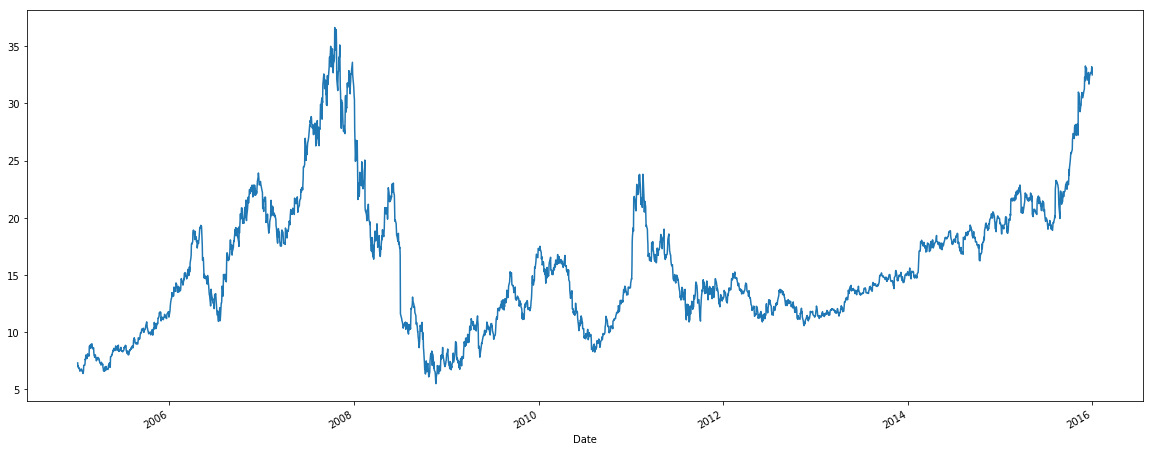

In [10]:
# Select a company's specific column to plot a single stock's adjusted closing price.
daily_adj_closing_prices['NVDA'].plot(figsize=(20, 8)) 

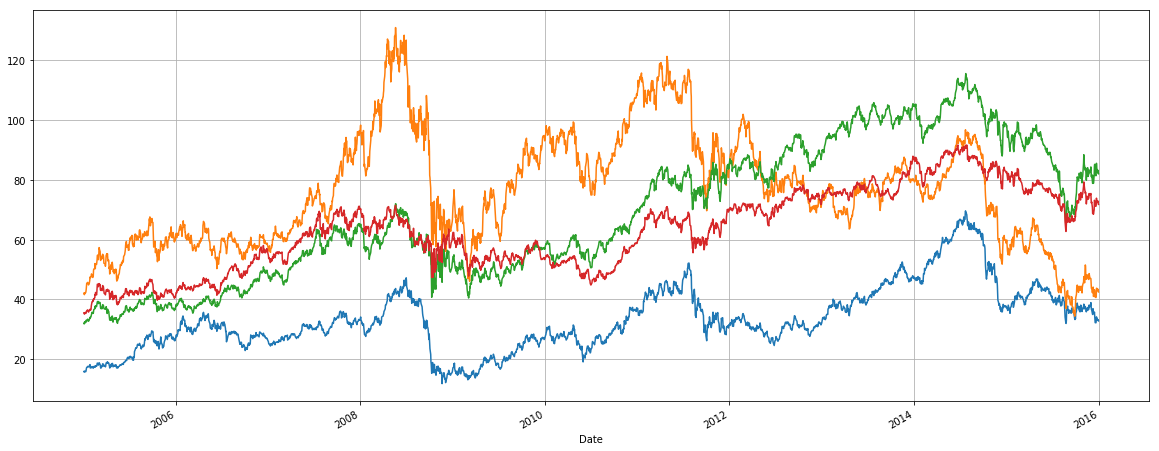

In [11]:
# Executing the commands sequentially will result in one graph that includes the specified stocks. 
daily_adj_closing_prices['HAL'].plot(figsize=(20, 8), grid=True) # Add grid
daily_adj_closing_prices['APA'].plot(figsize=(20, 8), grid=True)
daily_adj_closing_prices['CVX'].plot(figsize=(20, 8), grid=True)
daily_adj_closing_prices['XOM'].plot(figsize=(20, 8), grid=True)

Text(0.5,1,'Information Technology Sector Daily Adjusted Closing Prices (NVDA, CSCO, ADSK, ADBE) from 2005 - 2015')

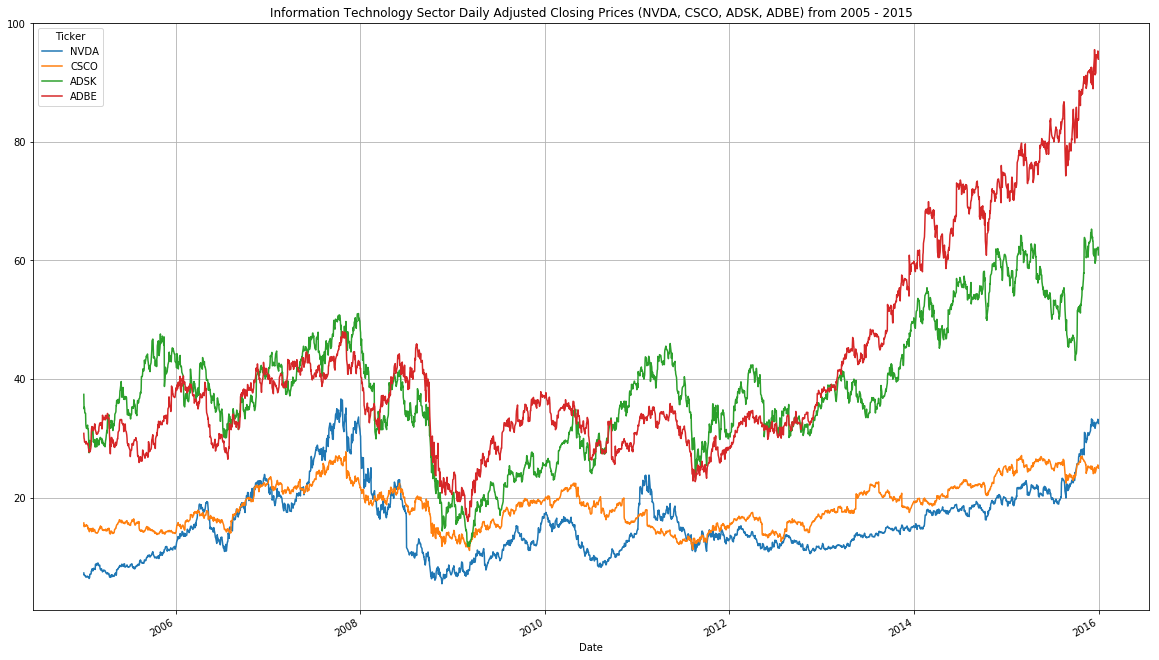

In [12]:
# Alternative
# Daily adjusted closing prices for the information technology sector.
information_technology_sector = daily_adj_closing_prices[['NVDA', 'CSCO', 'ADSK', 'ADBE']].copy()

# Display the sector data.
information_technology_sector.plot(figsize=(20, 12), grid=True)
plt.title('Information Technology Sector Daily Adjusted Closing Prices (NVDA, CSCO, ADSK, ADBE) from 2005 - 2015')

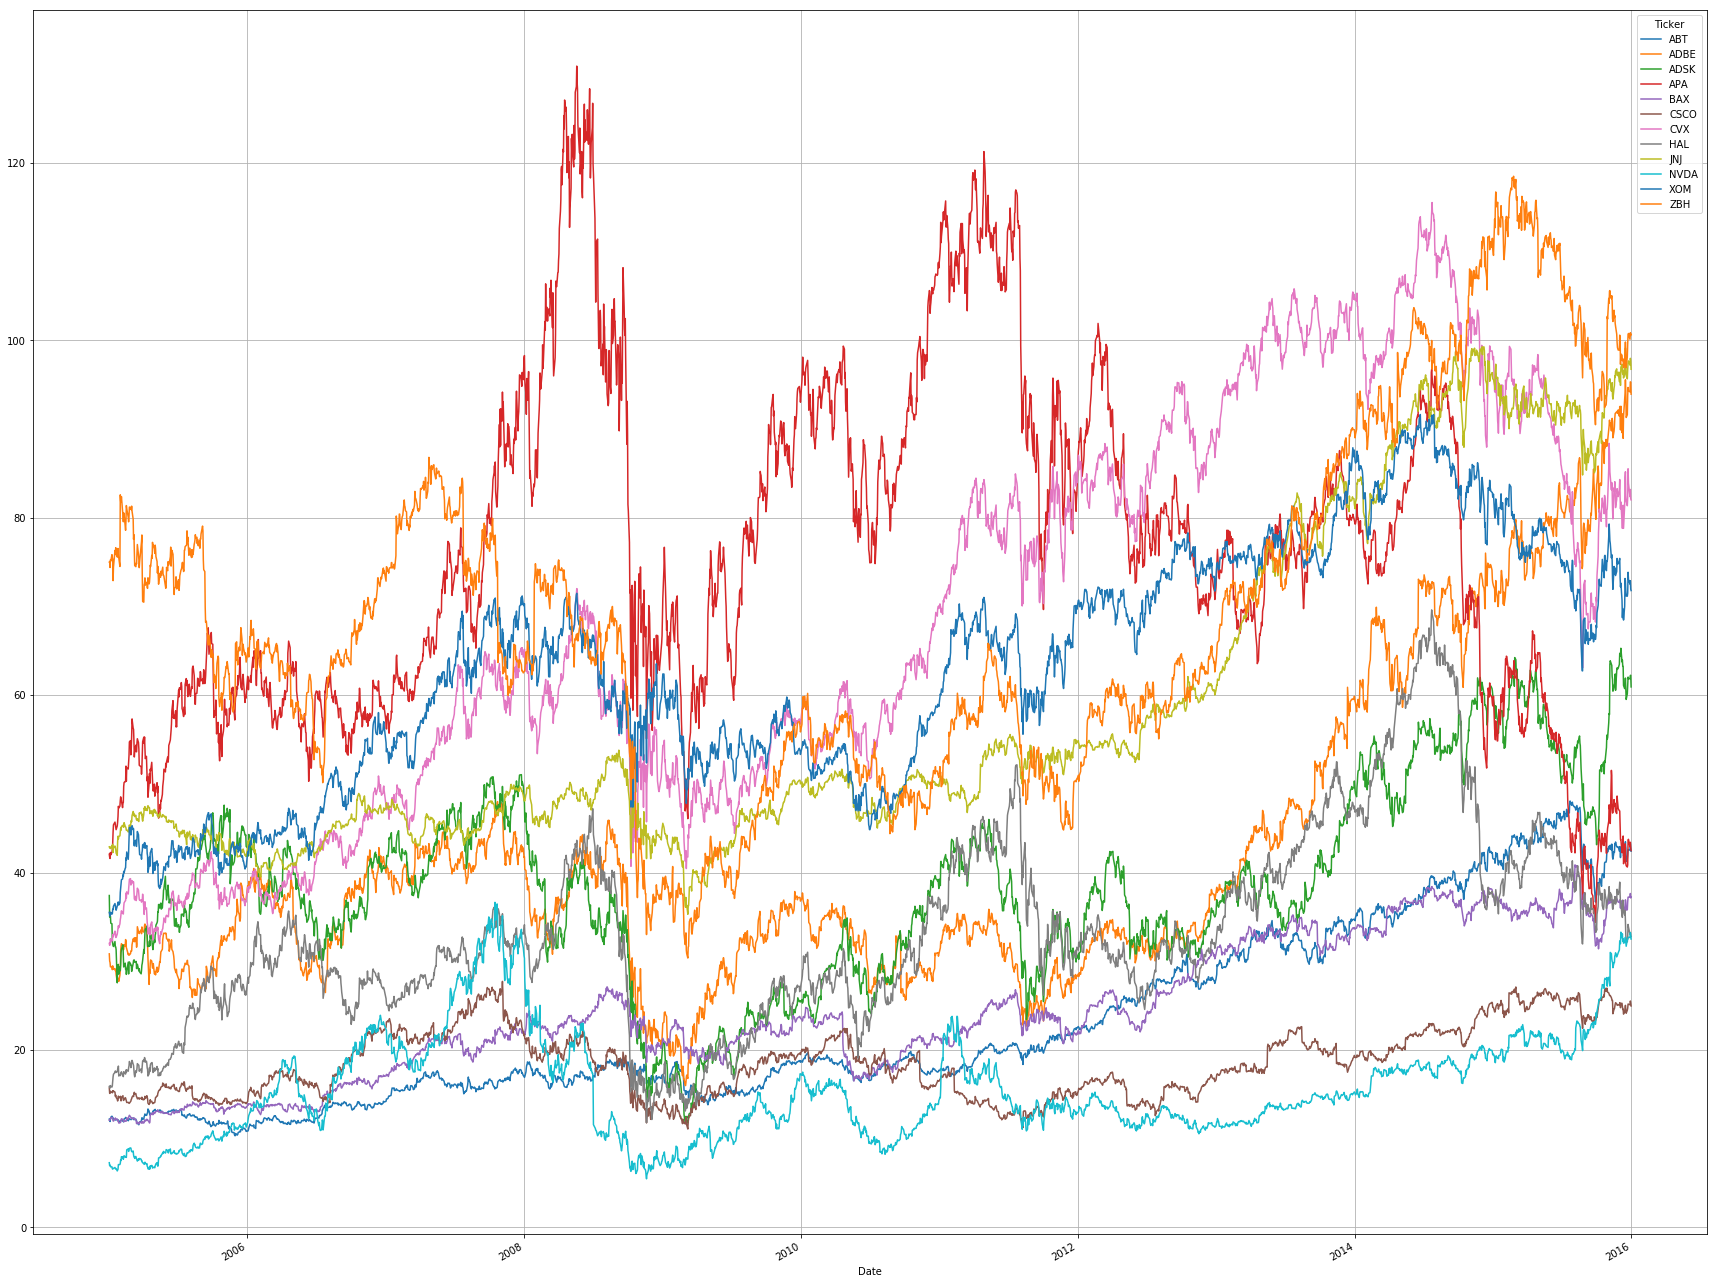

In [13]:
# Plot all of the adjusted closing prices for every stock in the DataFrame.
daily_adj_closing_prices.plot(figsize=(30, 25), grid=True) # figsize values can be modified to adjust sizing.

In [14]:
# Use %matplotlib notebook before the plot function to display an interactive chart.
# If this does not work an intended then execute 'conda install pyqt' in your Anaconda Prompt.
# %matplotlib inline will return charts back to normal.
# %matplotlib notebook 
# _ = daily_adj_closing_prices.plot(figsize=(10, 6))

## Plotting trading volume data

The following commands will allow the plotting of volume-series data for a specified stock.

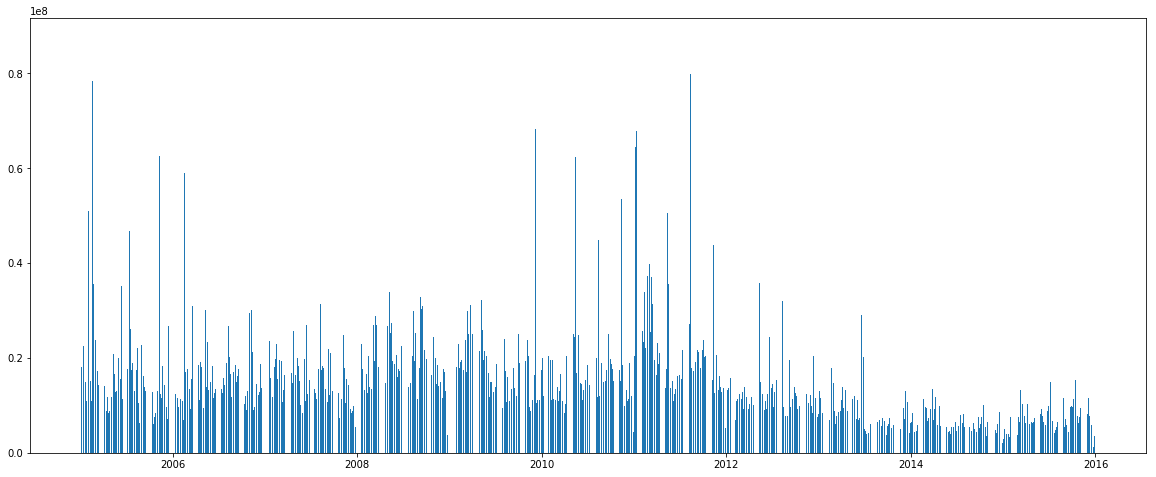

In [15]:
nvdaVolume = stocks_data.Volume.loc['NVDA']
plt.bar(nvdaVolume.index, nvdaVolume)
plt.gcf().set_size_inches(20, 8)

## Combining adjusted closing prices and volumes

Plotting a stock's trading volume relative to its adjusted closing price.

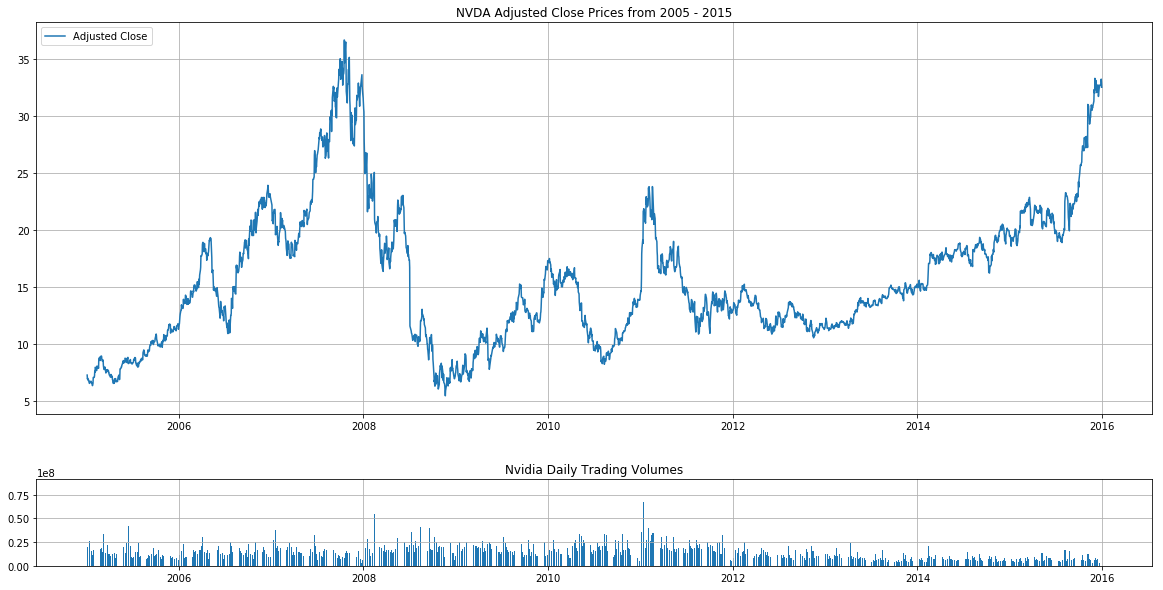

In [16]:
top = plt.subplot2grid((4, 4), (0, 0), rowspan = 3, colspan = 4)
top.plot(daily_adj_closing_prices.index, daily_adj_closing_prices.NVDA, label = 'Adjusted Close')
top.grid(True)
plt.title('NVDA Adjusted Close Prices from 2005 - 2015')
plt.legend(loc = 2)
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan = 1, colspan = 4)
bottom.bar(nvdaVolume.index, nvdaVolume)
bottom.grid(True)
plt.title('Nvidia Daily Trading Volumes')
plt.gcf().set_size_inches(20, 10)
plt.subplots_adjust(hspace = 0.75)

## Plotting candlestick charts

These charts are used to illustrate price movments of a stock over time. 

Information on these types of charts: http://stockcharts.com/school/doku.php?id=chart_school:chart_analysis:introduction_to_candlesticks

In [17]:
# Obtain subset data for Nvidia only from December 2012.
subset_data = stocks_data.loc['NVDA'].loc['2012-12':'2012-12'].reset_index()
subset_data

         Date   Open   High    ...     Close  Adj Close    Volume
0  2012-12-03  12.12  12.12    ...     11.75     10.958   9784500
1  2012-12-04  11.77  12.12    ...     12.10     11.284  13201700
2  2012-12-05  12.00  12.08    ...     11.96     11.154  15825600
3  2012-12-06  11.93  12.06    ...     11.98     11.172  10322400
4  2012-12-07  11.99  12.05    ...     11.96     11.154   8457200
..        ...    ...    ...    ...       ...        ...       ...
15 2012-12-24  12.34  12.38    ...     12.25     11.424   3184400
16 2012-12-26  12.22  12.42    ...     12.24     11.415   4918500
17 2012-12-27  12.26  12.28    ...     12.16     11.340   7495100
18 2012-12-28  12.05  12.29    ...     12.10     11.284   5515000
19 2012-12-31  12.06  12.31    ...     12.26     11.433   8161500

[20 rows x 7 columns]

The data must now be formatted in a couple ways before it can used as an input.

In [18]:
# Date formatting
import matplotlib.dates as mdates
subset_data['date_num'] = subset_data.Date.apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset_data

         Date   Open   High    ...     Adj Close    Volume  date_num
0  2012-12-03  12.12  12.12    ...        10.958   9784500  734840.0
1  2012-12-04  11.77  12.12    ...        11.284  13201700  734841.0
2  2012-12-05  12.00  12.08    ...        11.154  15825600  734842.0
3  2012-12-06  11.93  12.06    ...        11.172  10322400  734843.0
4  2012-12-07  11.99  12.05    ...        11.154   8457200  734844.0
..        ...    ...    ...    ...           ...       ...       ...
15 2012-12-24  12.34  12.38    ...        11.424   3184400  734861.0
16 2012-12-26  12.22  12.42    ...        11.415   4918500  734863.0
17 2012-12-27  12.26  12.28    ...        11.340   7495100  734864.0
18 2012-12-28  12.05  12.29    ...        11.284   5515000  734865.0
19 2012-12-31  12.06  12.31    ...        11.433   8161500  734868.0

[20 rows x 8 columns]

In [19]:
# Formatting subset_data into a list of tuples.
tuples_subset_data = [tuple(x) for x in subset_data[['date_num', 'Open', 'High', 'Low', 'Close']].values]
tuples_subset_data[:5]

[(734840.0, 12.12, 12.12, 11.72, 11.75),
 (734841.0, 11.77, 12.12, 11.7, 12.1),
 (734842.0, 12.0, 12.08, 11.79, 11.96),
 (734843.0, 11.93, 12.06, 11.89, 11.98),
 (734844.0, 11.99, 12.05, 11.82, 11.96)]

Format the x-axis before plotting.

More Information: https://matplotlib.org/api/dates_api.html

In [20]:
# Specify the month of December 2012 so that the proper labels appear on the x-axis.
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')

In [21]:
# Specify the days that should be labeled on the x-axis. In this case mondays.
from matplotlib.dates import WeekdayLocator, MONDAY
mondays = WeekdayLocator(MONDAY)

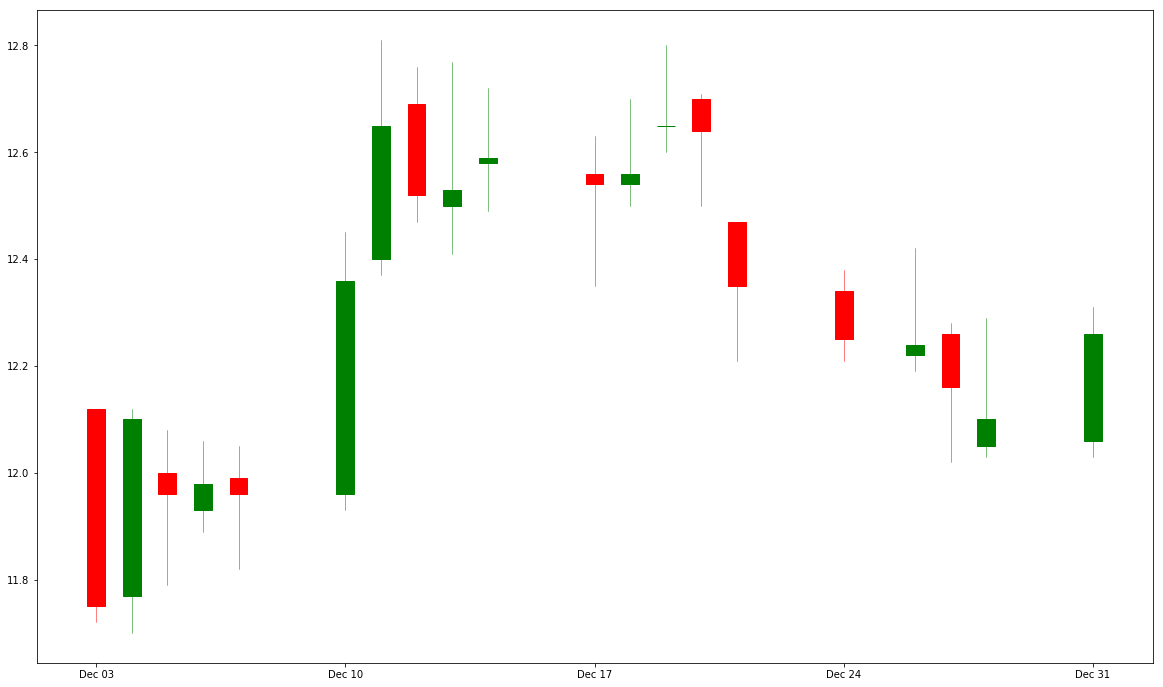

In [22]:
from matplotlib.finance import candlestick_ohlc

# Plot the candlestick chart.
fig, ax = plt.subplots(figsize=(20, 12)) 
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
candlestick_ohlc(ax, tuples_subset_data, width=0.5, colorup='g', colordown='r');

## Calculating daily change in value

The following will determine the percentage change in the value of a stock over one day.

In [23]:
# Calculate the adjusted closing price percentage change for NVDA between 2005-01-03 and 2005-01-04
NVDA_p1 = daily_adj_closing_prices.iloc[0]['NVDA']  # 2005-01-03
NVDA_p2 = daily_adj_closing_prices.iloc[1]['NVDA']  # 2005-01-04
percentage_return = (NVDA_p2 - NVDA_p1) / NVDA_p1
# Alternative
# percentage_return = NVDA_p2 / NVDA_p1 - 1 

NVDA_p1, NVDA_p2, percentage_return # -4.7% change

(7.28303, 6.940189999999999, -0.047073814058159955)

In [24]:
# Finding the percentage return for all of the stocks in the daily_adj_closing_prices DataFrame.
daily_returns_for_stock_data = daily_adj_closing_prices.iloc[1:] / daily_adj_closing_prices.iloc[:-1].values - 1

# Display first 10 rows of returns.
daily_returns_for_stock_data.loc[:,'ABT':][:10]


Ticker        ABT       ADBE   ADSK    ...       NVDA        XOM        ZBH
Date                                   ...                                 
2005-01-04 -0.010 -2.642e-02 -0.065    ...     -0.047 -6.788e-03 -3.778e-04
2005-01-05 -0.011 -5.495e-03  0.008    ...      0.009 -5.226e-03 -7.814e-03
2005-01-06  0.023 -1.657e-02 -0.005    ...     -0.010  1.273e-02  1.156e-02
2005-01-07  0.017  6.809e-04 -0.023    ...     -0.019 -6.584e-03 -1.758e-03
2005-01-10  0.010  6.805e-04 -0.002    ...      0.002  3.816e-03  9.560e-03
2005-01-11 -0.018 -1.190e-02 -0.054    ...     -0.031 -2.601e-03 -4.236e-03
2005-01-12  0.008  1.480e-02 -0.013    ...     -0.008  1.484e-02 -2.878e-03
2005-01-13 -0.019 -1.289e-02 -0.006    ...      0.010 -7.908e-04 -3.175e-02
2005-01-14  0.005  1.718e-04 -0.003    ...      0.003  1.029e-02  2.087e-02
2005-01-18 -0.005  2.576e-03  0.018    ...      0.016  8.419e-03  2.526e-02

[10 rows x 12 columns]

An alternative and easier way is to just use the .pct_change() method.

In [25]:
daily_percentage_change_for_stock_data = daily_adj_closing_prices.pct_change()
print(daily_percentage_change_for_stock_data.iloc[:,:][:10].to_string())

Ticker        ABT       ADBE   ADSK    APA    BAX       CSCO        CVX    HAL        JNJ   NVDA        XOM        ZBH
Date                                                                                                                  
2005-01-03    NaN        NaN    NaN    NaN    NaN        NaN        NaN    NaN        NaN    NaN        NaN        NaN
2005-01-04 -0.010 -2.642e-02 -0.065 -0.008 -0.002 -3.934e-02 -6.876e-03  0.001 -3.179e-03 -0.047 -6.788e-03 -3.778e-04
2005-01-05 -0.011 -5.495e-03  0.008 -0.003  0.011  5.384e-04  6.529e-03 -0.013 -6.385e-04  0.009 -5.226e-03 -7.814e-03
2005-01-06  0.023 -1.657e-02 -0.005  0.016  0.004  1.508e-02  1.671e-02  0.018  2.873e-03 -0.010  1.273e-02  1.156e-02
2005-01-07  0.017  6.809e-04 -0.023 -0.006  0.012 -6.897e-03 -1.121e-02 -0.007 -3.660e-03 -0.019 -6.584e-03 -1.758e-03
2005-01-10  0.010  6.805e-04 -0.002  0.007 -0.001  0.000e+00  4.497e-03 -0.004  7.826e-03  0.002  3.816e-03  9.560e-03
2005-01-11 -0.018 -1.190e-02 -0.054  0.009  0.00

In [26]:
# Replace the 'NaN' values with zero and just display the information from the first three stocks.
daily_percentage_change_for_stock_data.fillna(0, inplace=True)
daily_percentage_change_for_stock_data.iloc[:10, :3]

Ticker        ABT       ADBE   ADSK
Date                               
2005-01-03  0.000  0.000e+00  0.000
2005-01-04 -0.010 -2.642e-02 -0.065
2005-01-05 -0.011 -5.495e-03  0.008
2005-01-06  0.023 -1.657e-02 -0.005
2005-01-07  0.017  6.809e-04 -0.023
2005-01-10  0.010  6.805e-04 -0.002
2005-01-11 -0.018 -1.190e-02 -0.054
2005-01-12  0.008  1.480e-02 -0.013
2005-01-13 -0.019 -1.289e-02 -0.006
2005-01-14  0.005  1.718e-04 -0.003

In [27]:
# Obtaining daily percentage change data for one particular stock.
daily_percentage_change_for_stock_data.XOM # XOM

Date
2005-01-03    0.000
2005-01-04   -0.007
2005-01-05   -0.005
2005-01-06    0.013
2005-01-07   -0.007
              ...  
2015-12-24   -0.011
2015-12-28   -0.007
2015-12-29    0.005
2015-12-30   -0.013
2015-12-31   -0.002
Name: XOM, Length: 2769, dtype: float64

## Calculating daily cumulative rate of returns

Investors use cumulative returns to determine the value of an investment after the investment has been made. It gives periodic insights into the return value relative to the day of investment, and it can be calculated with the .cumprod() method.

More information: https://www.investopedia.com/terms/c/cumulativereturn.asp

In [28]:
daily_cumulative_returns = (1 + daily_percentage_change_for_stock_data).cumprod()

# Display all rows and columns.
print(daily_cumulative_returns.iloc[:,:][:].to_string())

Ticker        ABT   ADBE   ADSK    APA    BAX   CSCO    CVX    HAL    JNJ   NVDA    XOM    ZBH
Date                                                                                          
2005-01-03  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
2005-01-04  0.990  0.974  0.935  0.992  0.998  0.961  0.993  1.001  0.997  0.953  0.993  1.000
2005-01-05  0.979  0.968  0.942  0.989  1.009  0.961  1.000  0.988  0.996  0.962  0.988  0.992
2005-01-06  1.001  0.952  0.938  1.005  1.013  0.976  1.016  1.006  0.999  0.953  1.001  1.003
2005-01-07  1.018  0.953  0.916  0.998  1.025  0.969  1.005  0.999  0.995  0.934  0.994  1.002
2005-01-10  1.028  0.953  0.915  1.005  1.023  0.969  1.009  0.995  1.003  0.936  0.998  1.011
2005-01-11  1.009  0.942  0.865  1.014  1.027  0.965  1.010  1.004  1.000  0.908  0.995  1.007
2005-01-12  1.017  0.956  0.854  1.030  1.020  0.980  1.031  1.039  1.007  0.900  1.010  1.004
2005-01-13  0.998  0.944  0.849  1.059  0.994  0.9

Text(0.5,1,'Energy Sector Daily Cumulative Returns (HAL, APA, CVX, XOM) from 2005 - 2015')

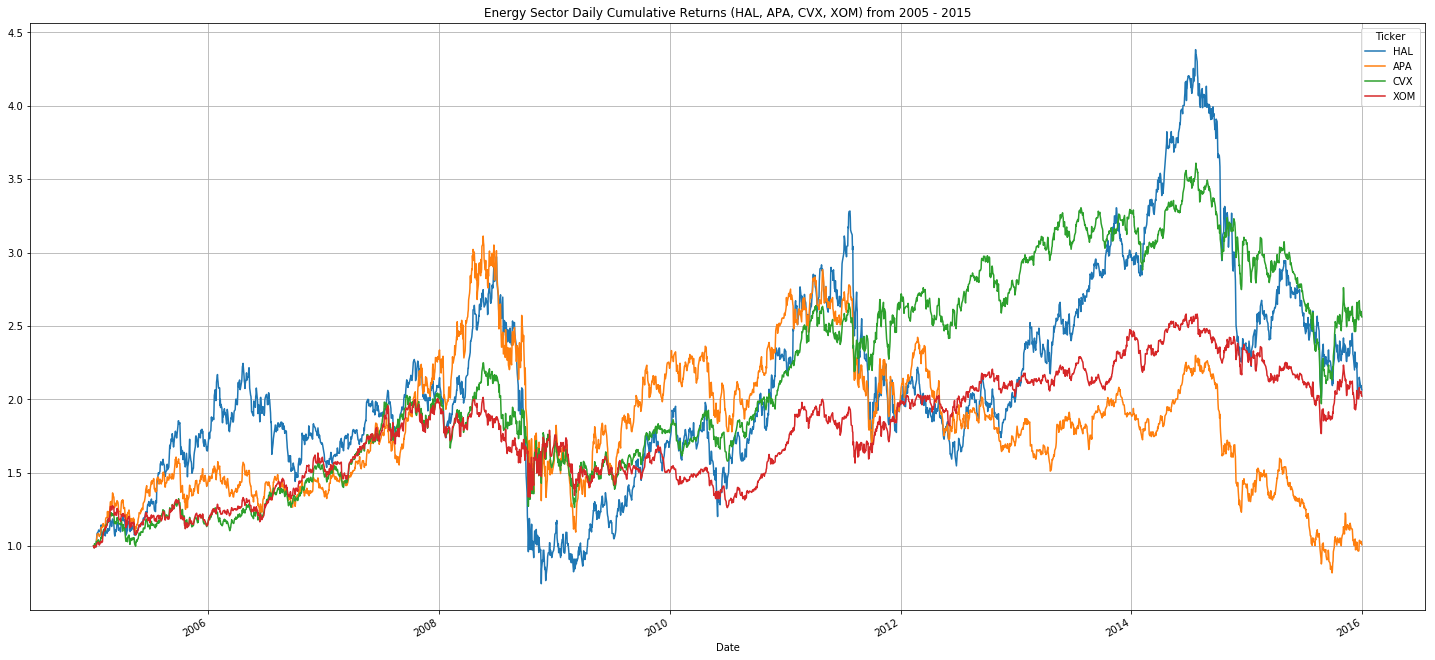

In [29]:
# Daily cumulative returns for the various sectors.
energy_sector = daily_cumulative_returns[['HAL', 'APA', 'CVX', 'XOM']].copy()
information_technology_sector = daily_cumulative_returns[['NVDA', 'CSCO', 'ADSK', 'ADBE']].copy()
health_care_sector = daily_cumulative_returns[['ABT', 'ZBH', 'JNJ', 'BAX']].copy()

# Display energy sector data.
energy_sector.plot(figsize=(25, 12), grid=True)
plt.title('Energy Sector Daily Cumulative Returns (HAL, APA, CVX, XOM) from 2005 - 2015')

Text(0.5,1,'Information Technology Sector Daily Cumulative Returns (NVDA, CSCO, ADSK, ADBE) from 2005 - 2015')

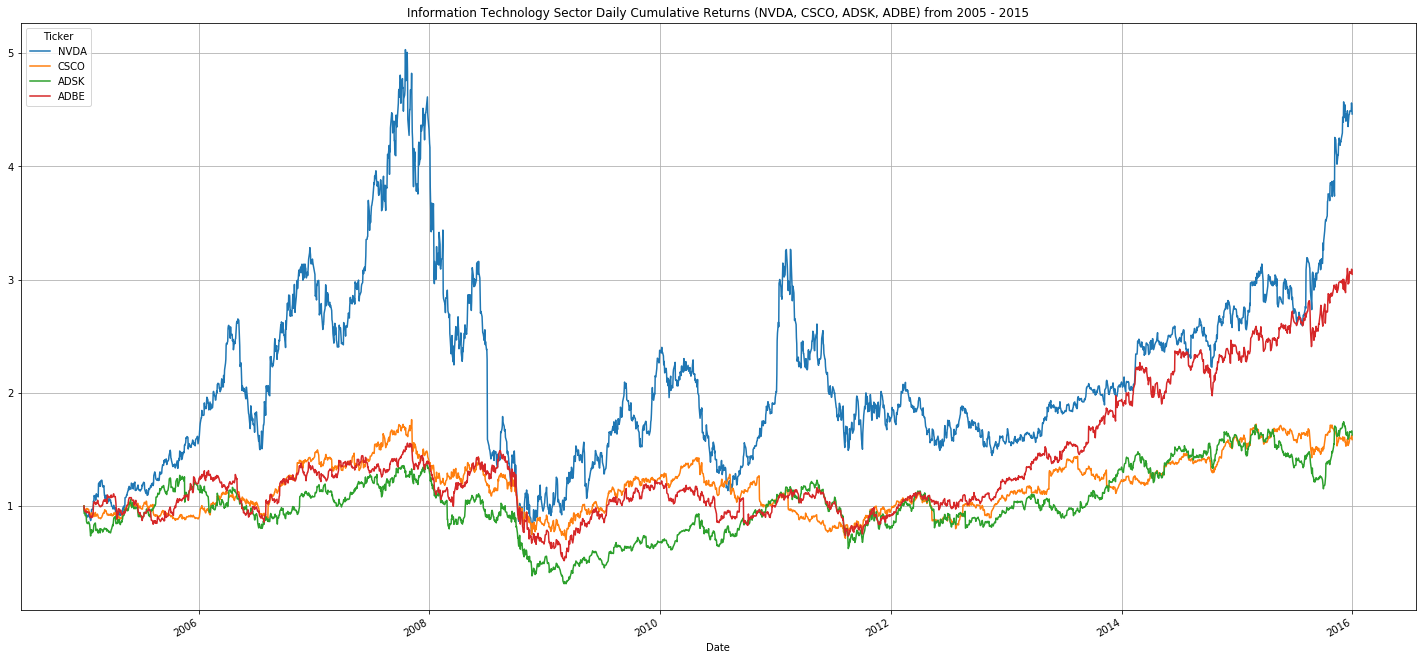

In [30]:
# Display information technology sector data.
information_technology_sector.plot(figsize=(25, 12), grid=True)
plt.title('Information Technology Sector Daily Cumulative Returns (NVDA, CSCO, ADSK, ADBE) from 2005 - 2015')

Text(0.5,1,'Health Care Sector Daily Cumulative Returns (ABT, ZBH, JNJ, BAX) from 2005 - 2015')

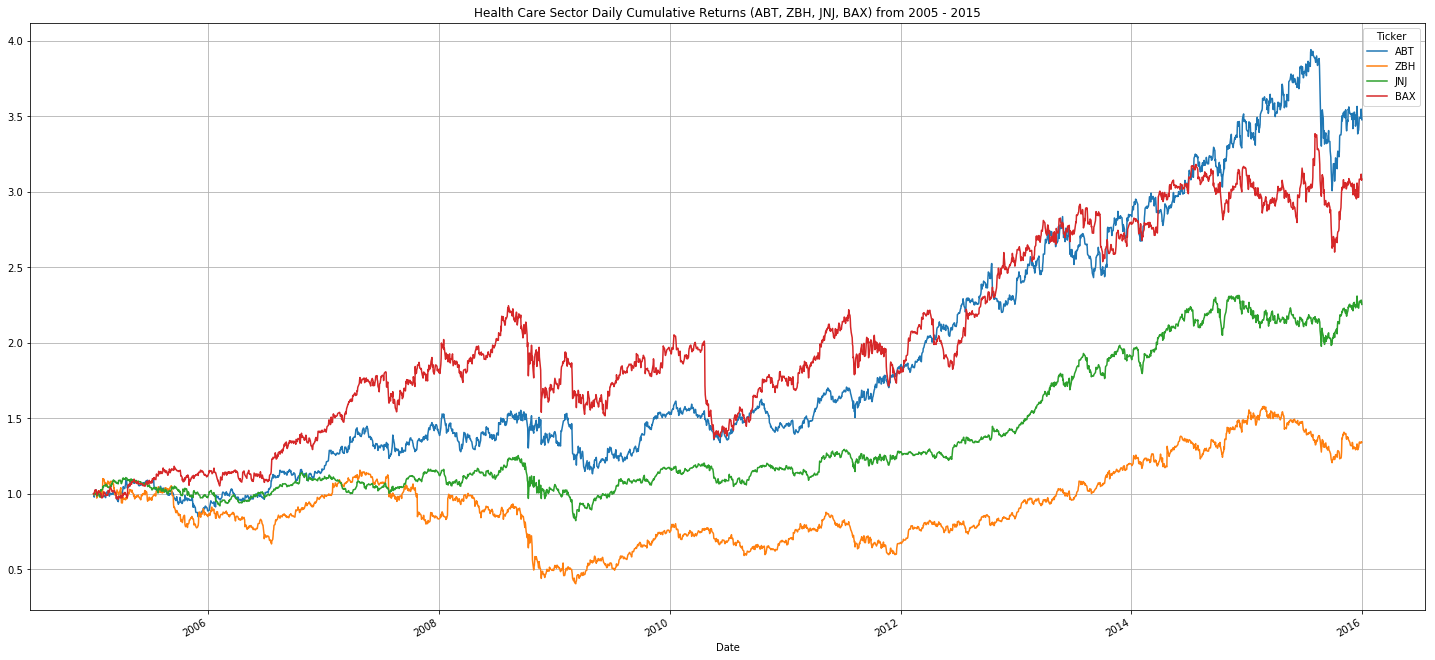

In [31]:
# Display health care sector data.
health_care_sector.plot(figsize=(25, 12), grid=True)
plt.title('Health Care Sector Daily Cumulative Returns (ABT, ZBH, JNJ, BAX) from 2005 - 2015')

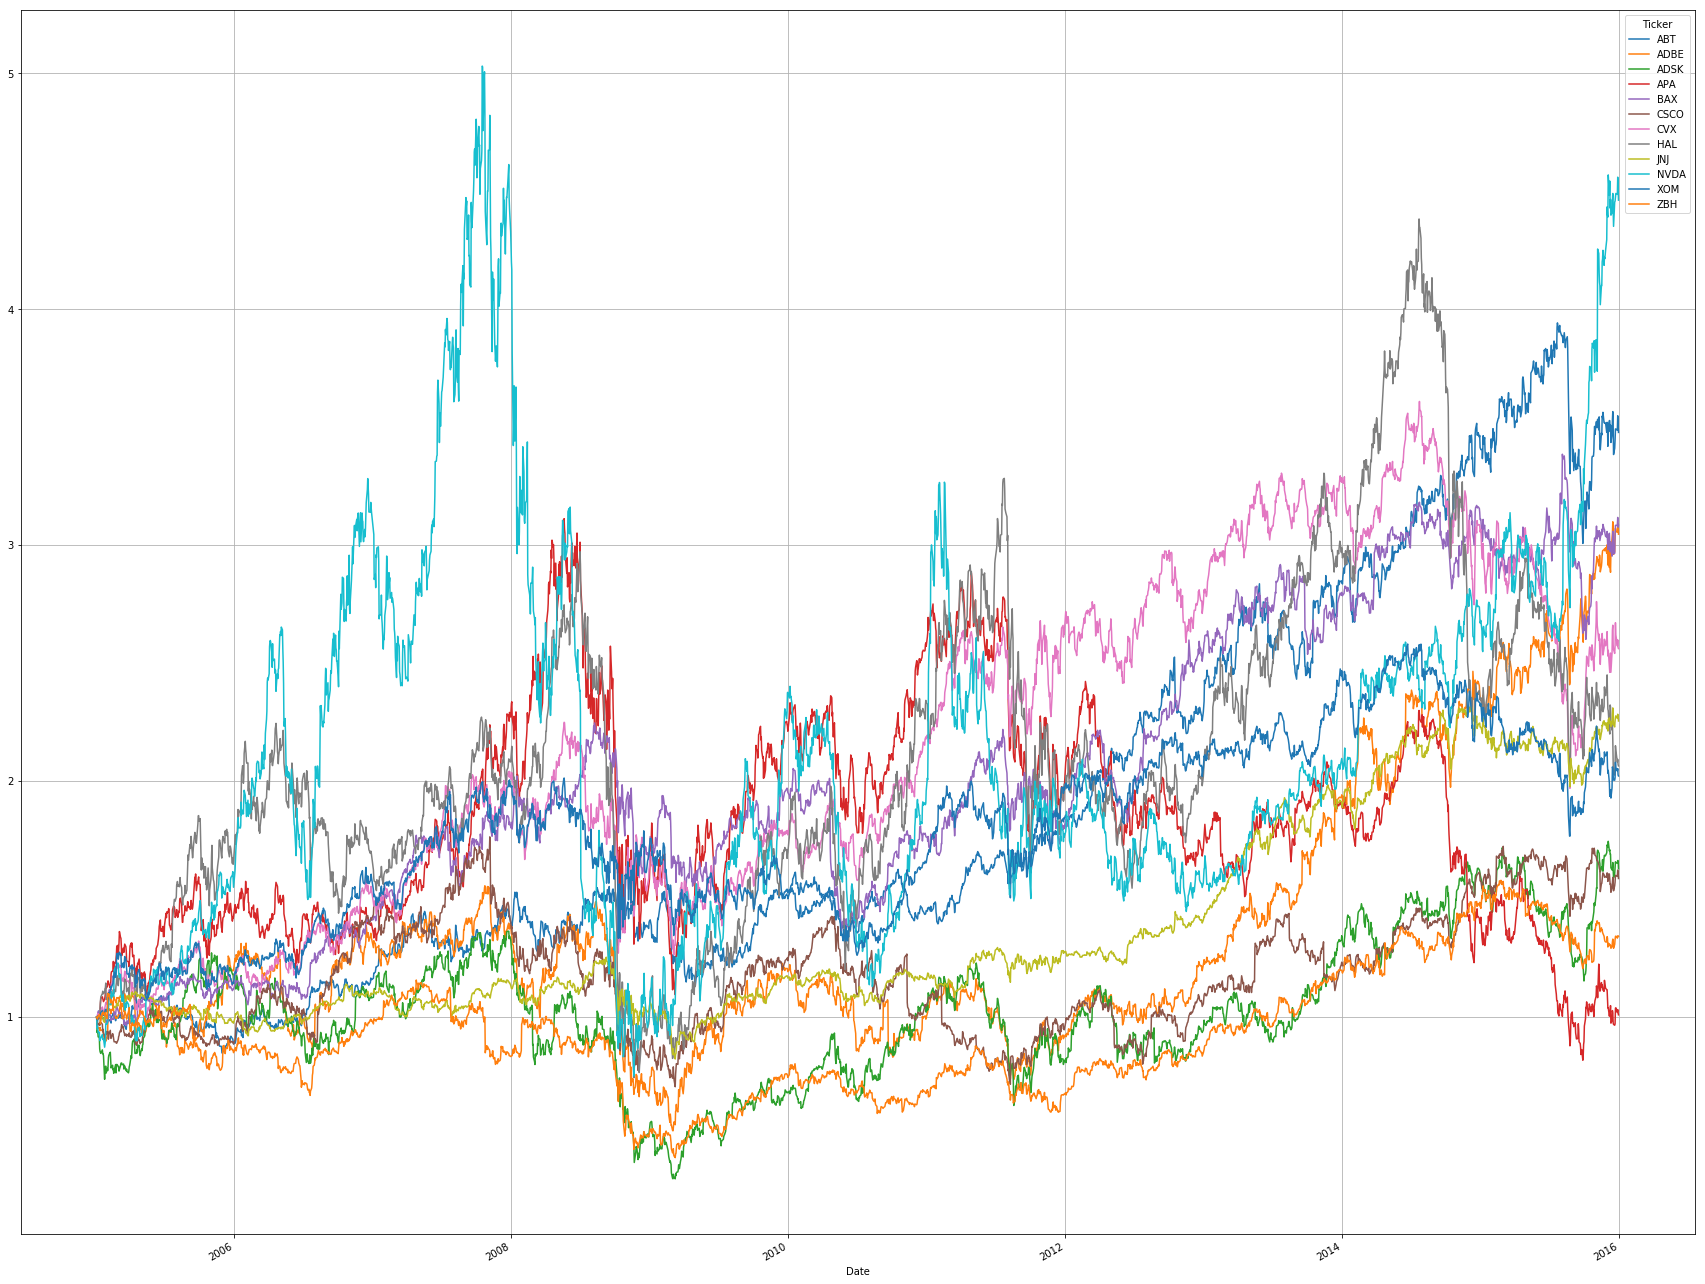

In [32]:
# Plot cumulative returns for all sectors.
daily_cumulative_returns.plot(figsize=(30, 25), grid=True)
# Opening the image in a new tab will display the chart in a fuller view.

## Histograms

These display the distribution of daily returns for a specific stock.

More Information: https://www.saferpak.com/histogram_articles/howto_histogram.pdf

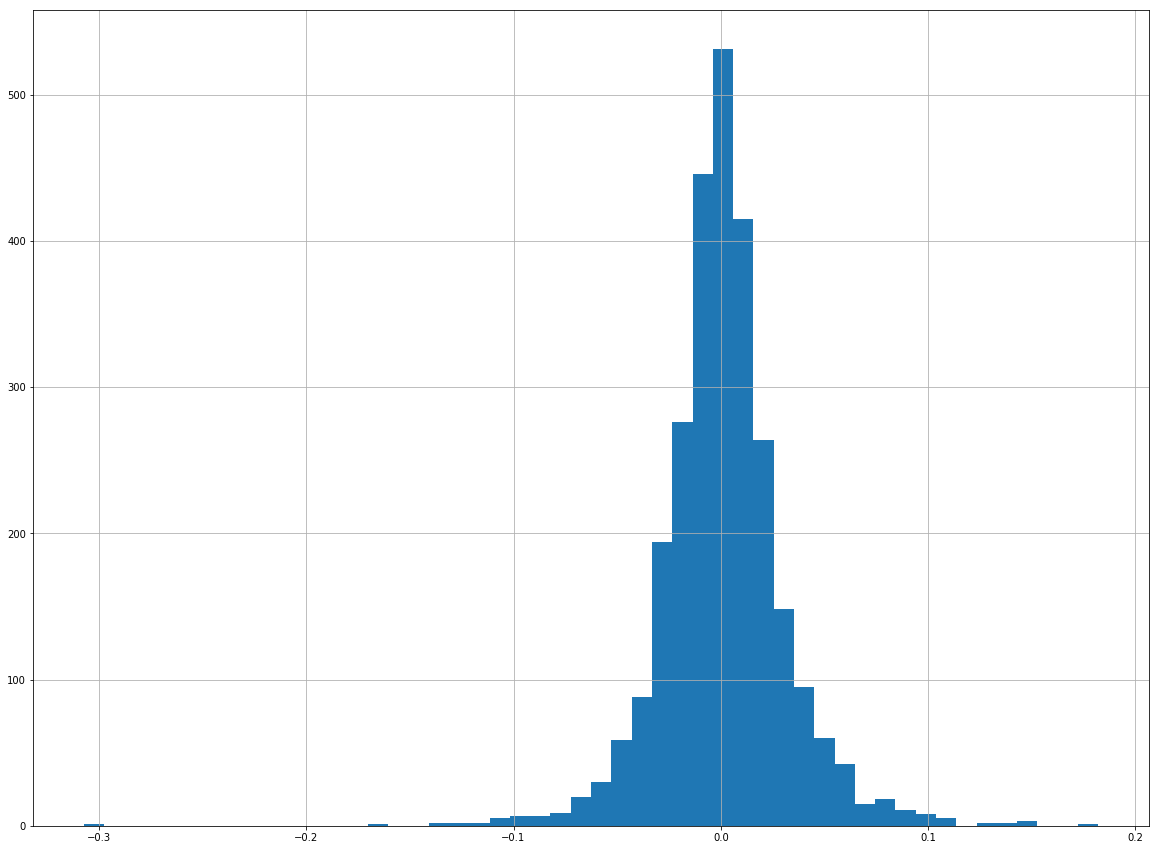

In [33]:
# Obtaining daily percentage change data for Nvidia stock.
nvda = daily_percentage_change_for_stock_data['NVDA']
# x-axis bins are set to 50
nvda.hist(bins=50, figsize=(20, 15))

In [34]:
# Display summary statistics that describe the histogram.
nvda.describe()

count    2.769e+03
mean     9.913e-04
std      2.993e-02
min     -3.073e-01
25%     -1.414e-02
50%      5.242e-04
75%      1.513e-02
max      1.821e-01
Name: NVDA, dtype: float64

In [35]:
# Obtain information regarding specific percentiles.
nvda.describe(percentiles=[0.05, 0.30, 0.65, 0.95])

count    2.769e+03
mean     9.913e-04
std      2.993e-02
min     -3.073e-01
5%      -4.374e-02
30%     -1.045e-02
50%      5.242e-04
65%      8.620e-03
95%      4.907e-02
max      1.821e-01
Name: NVDA, dtype: float64

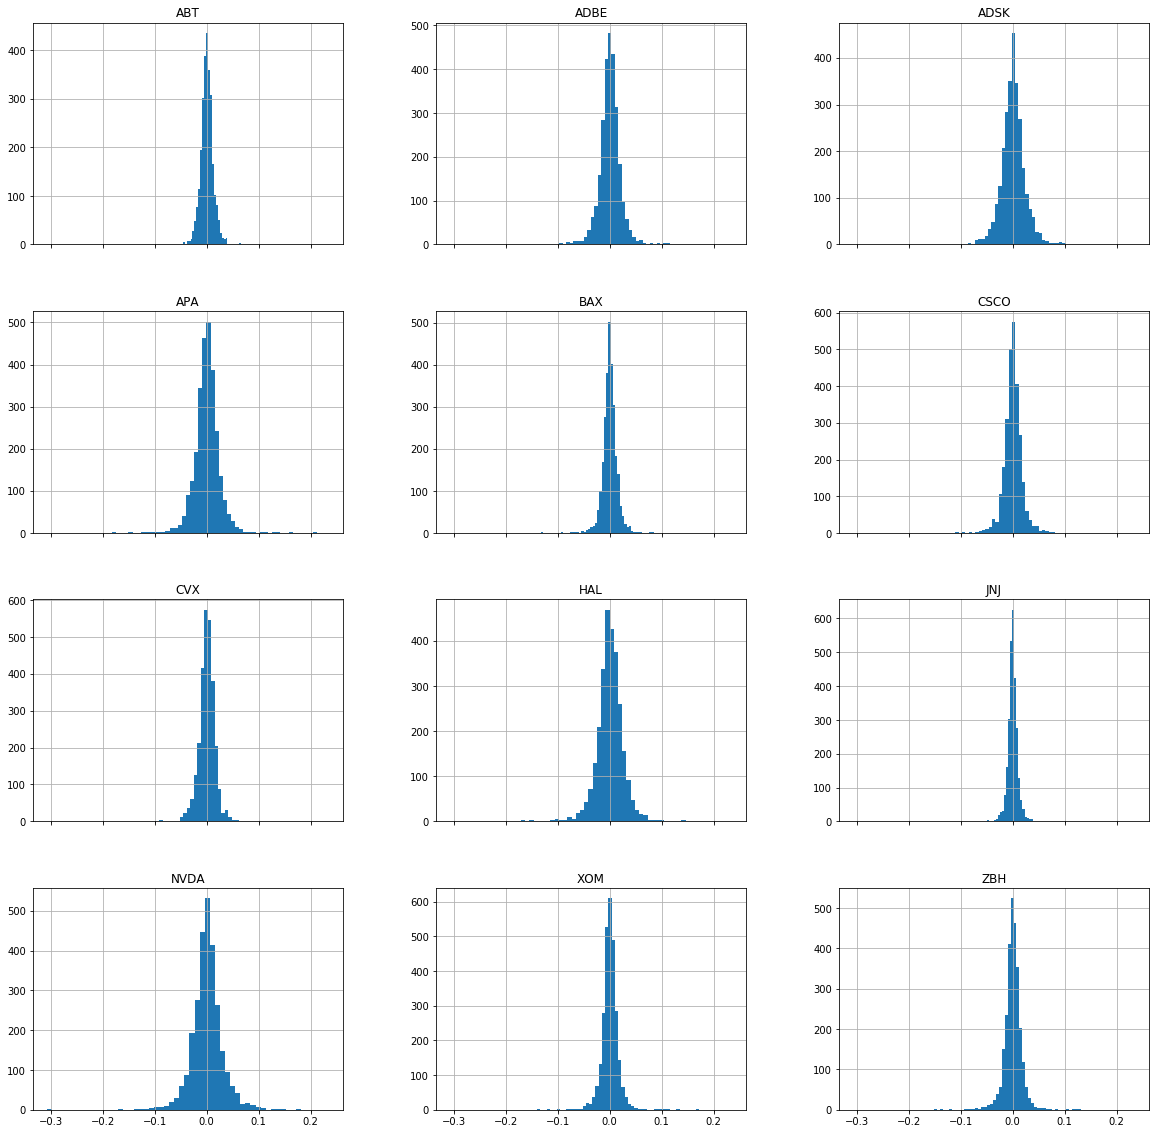

In [36]:
# Visualization of all stock distributions.
# Stocks that have a wider distribution in returns are more volatile due to their higher fluctuations.
daily_percentage_change_for_stock_data.hist(bins=50, sharex=True, figsize=(20, 20));

## Q-Q Plots

Quantile-Quantile plots are probability plots that compare two distributions by having their quantiles plotted against each other.

More Information: http://data.library.virginia.edu/understanding-q-q-plots/

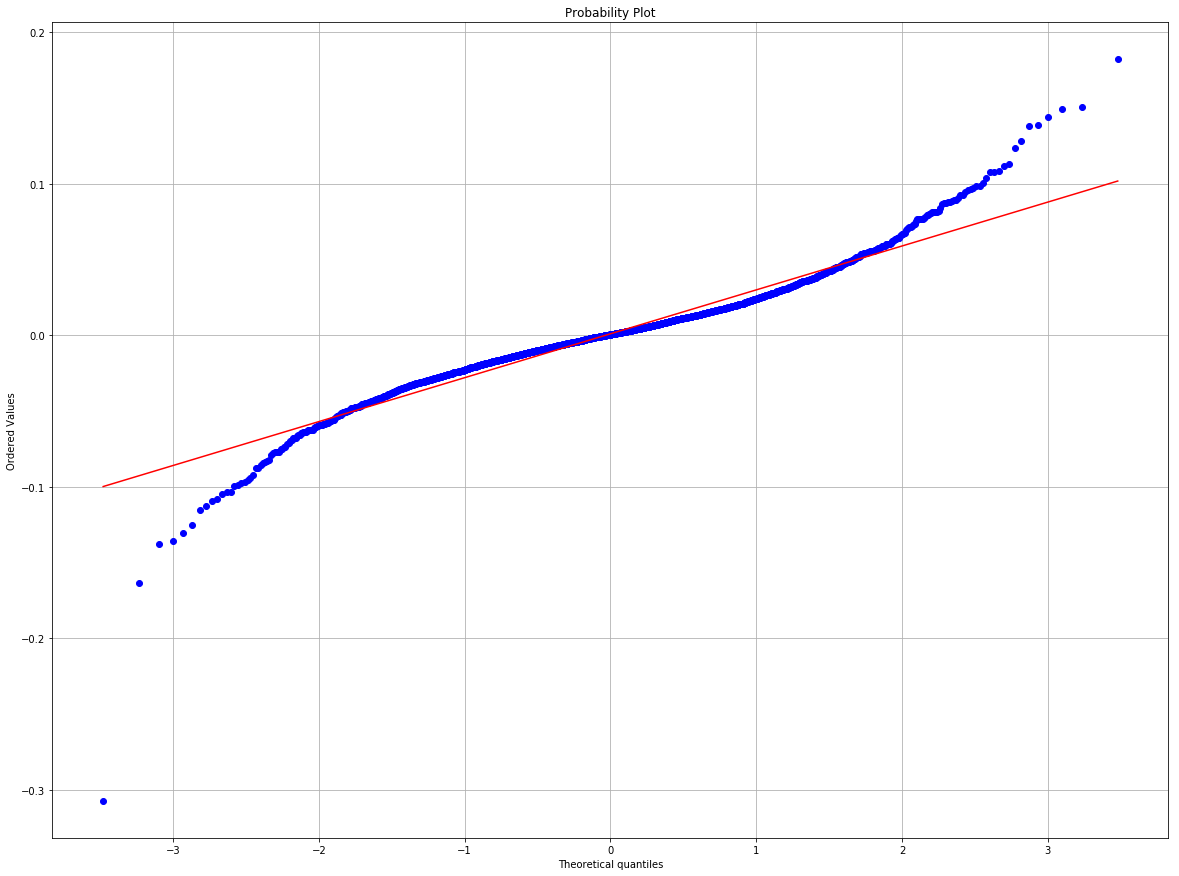

In [37]:
# Plot the returns of NVDA against some random normal values to determine how close the returns are to a normal distribution.
import scipy.stats as stats
f = plt.figure(figsize=(20, 15))
ax = f.add_subplot(111)
stats.probplot(nvda, dist='norm', plot=ax)
ax.grid(True)
plt.show()

Information on interpreting Q-Q plots: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

## Box-and-whisker Plots

Represents selections of data by their quartiles.

More Information: http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/box-whisker-plot.html

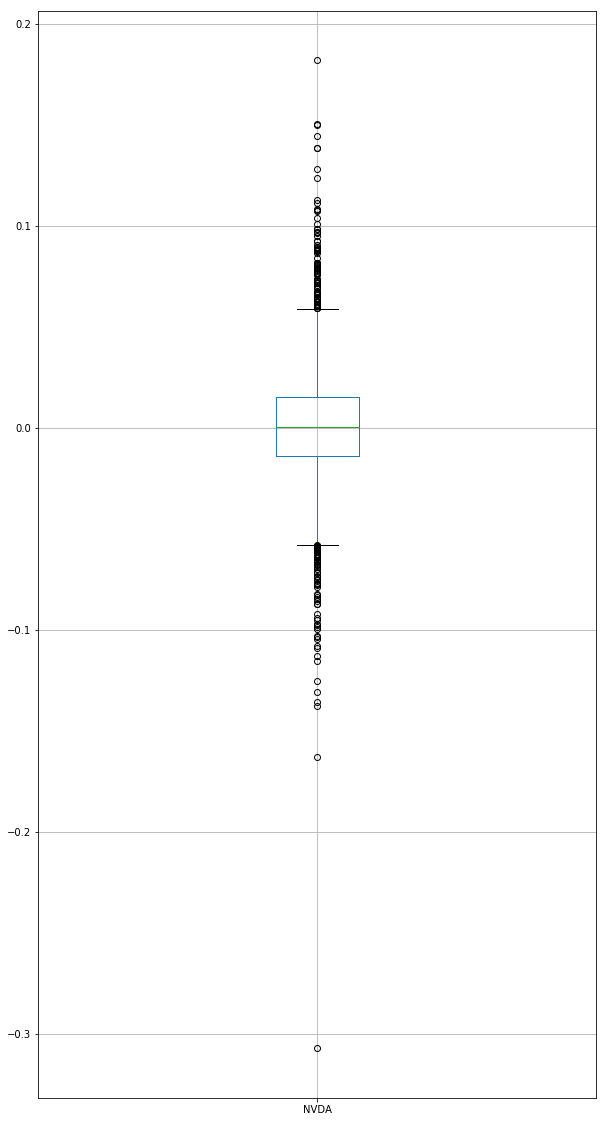

In [38]:
# Create box-and-whisker plot for Nvidia daily percentage changes. 
daily_percentage_change_for_stock_data[['NVDA']].plot(kind='box', figsize=(10, 20), grid=True);

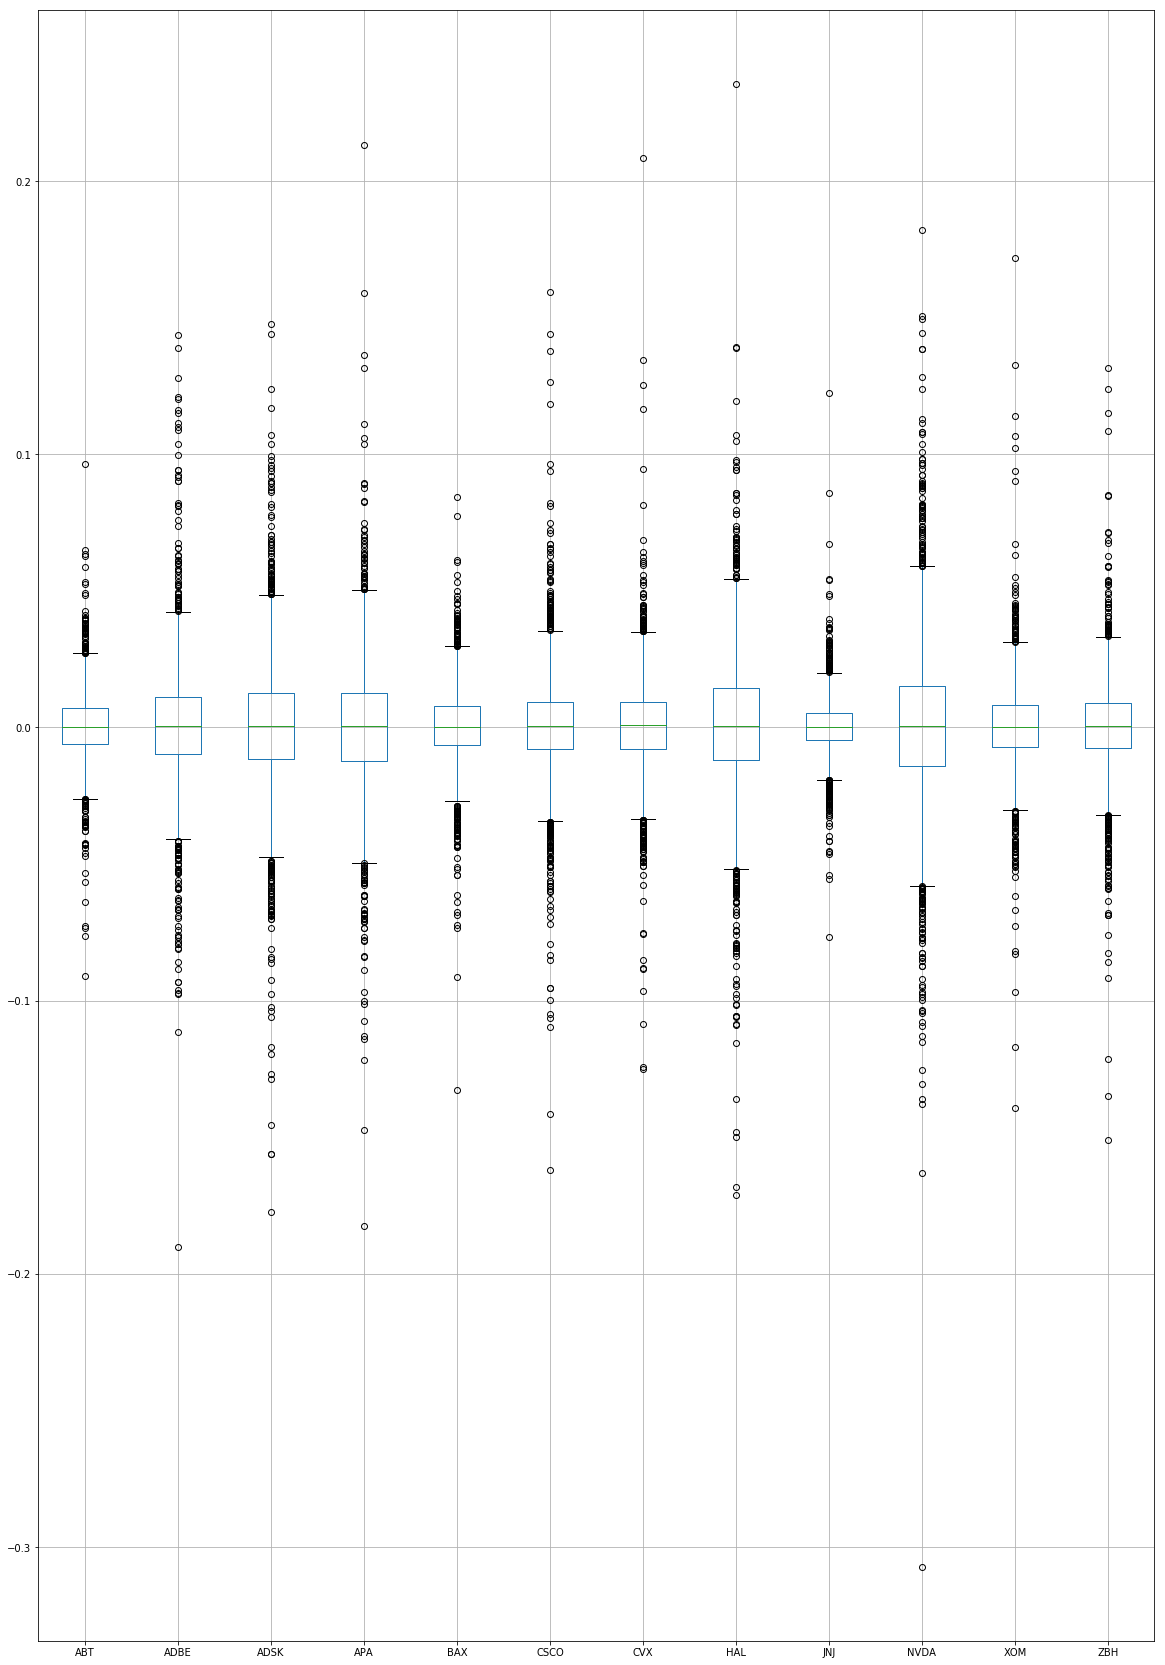

In [39]:
# Plot the distributions for all of the stocks.
# The more volitile stocks will display a wider box.
daily_percentage_change_for_stock_data.plot(kind='box', figsize=(20, 30), grid=True);

## Scatter Plots

Determining the correlation between two stock's daily percentage rates of change in prices can be done through scatter plots.

More Information: https://www.statcan.gc.ca/edu/power-pouvoir/ch9/scatter-nuages/5214827-eng.htm

In [40]:
# This function will plot the values from two stocks.
def display_scatter_plot(stock_data, x_stock, y_stock, x_limit = None, y_limit = None):
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111)
    ax.scatter(stock_data[x_stock], stock_data[y_stock])
    if x_limit is not None:
        ax.set_xlim(x_limit)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10, 10), (-10, 10))
    ax.set_xlabel(x_stock)
    ax.set_ylabel(y_stock)

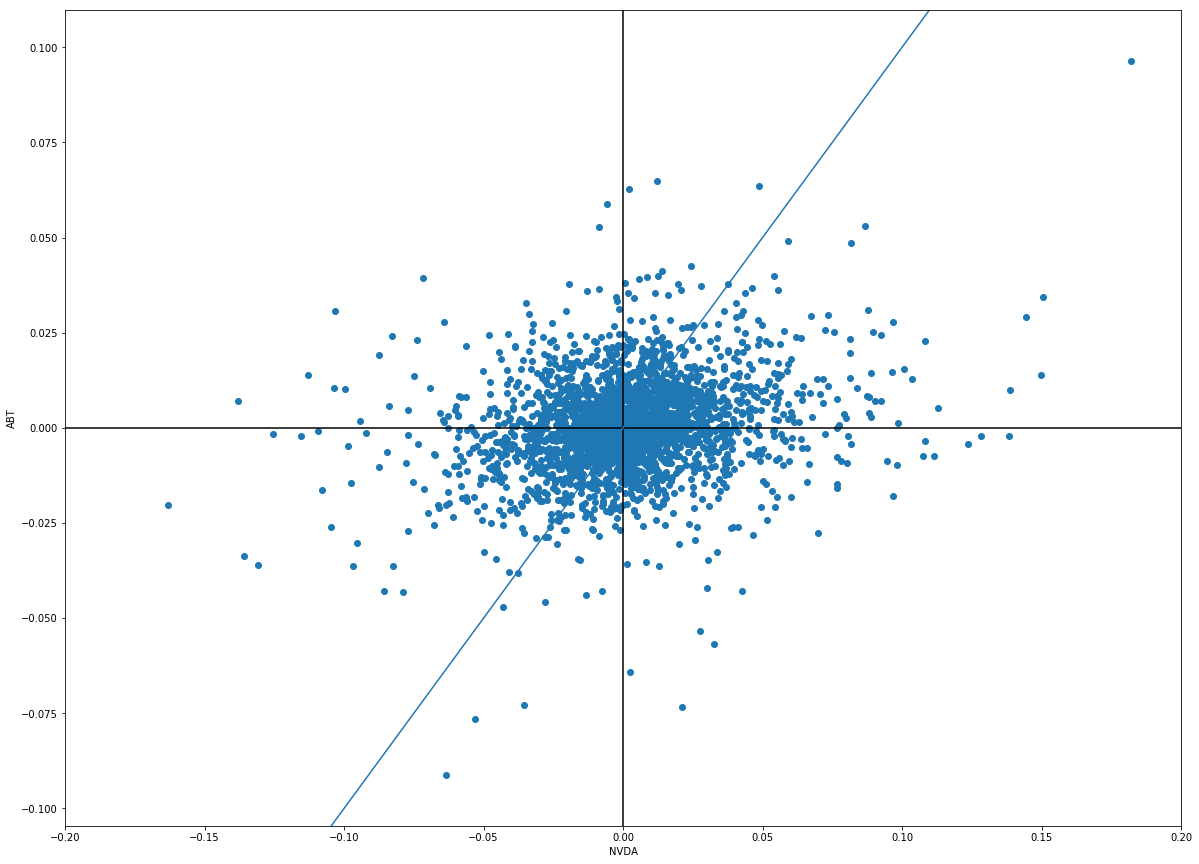

In [41]:
limits = [-0.20, 0.20]
# Comparing NVDA and ABT will result in a plot that shows virtually no correlation and quite a few outliers.
display_scatter_plot(daily_percentage_change_for_stock_data, 'NVDA', 'ABT', x_limit=limits)

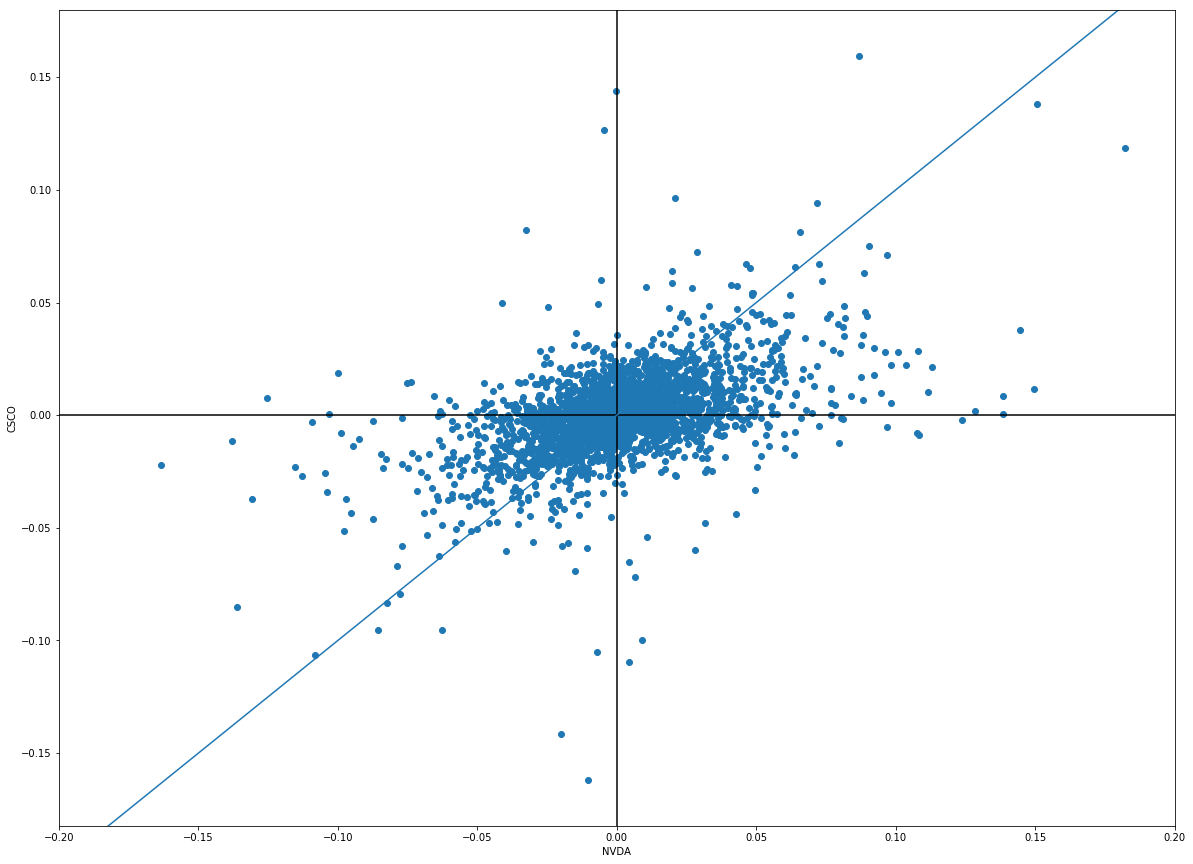

In [42]:
# This comparison shows a more slightly prominent positive correlation.
display_scatter_plot(daily_percentage_change_for_stock_data, 'NVDA', 'CSCO', x_limit=limits)

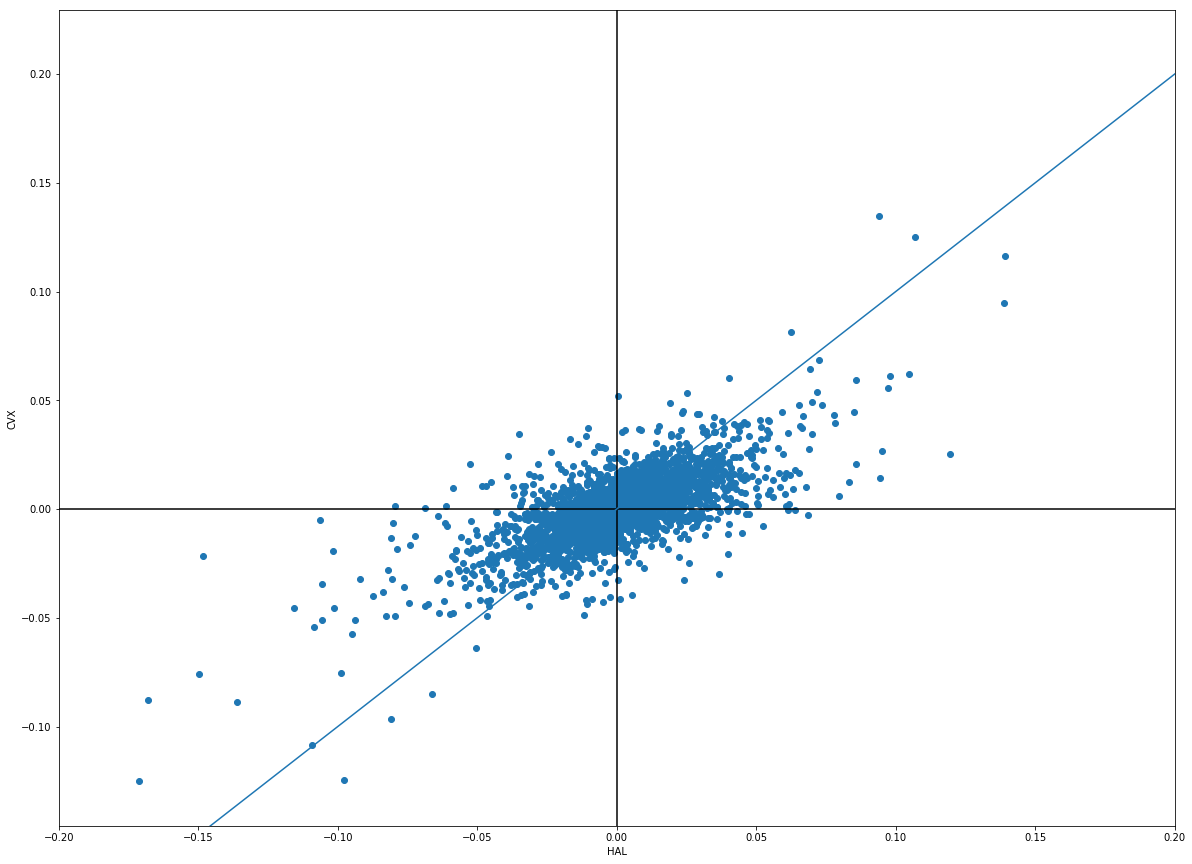

In [43]:
# An even greater positive correlation.
display_scatter_plot(daily_percentage_change_for_stock_data, 'HAL', 'CVX', x_limit=limits)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C98D162B0>,
      dtype=object)

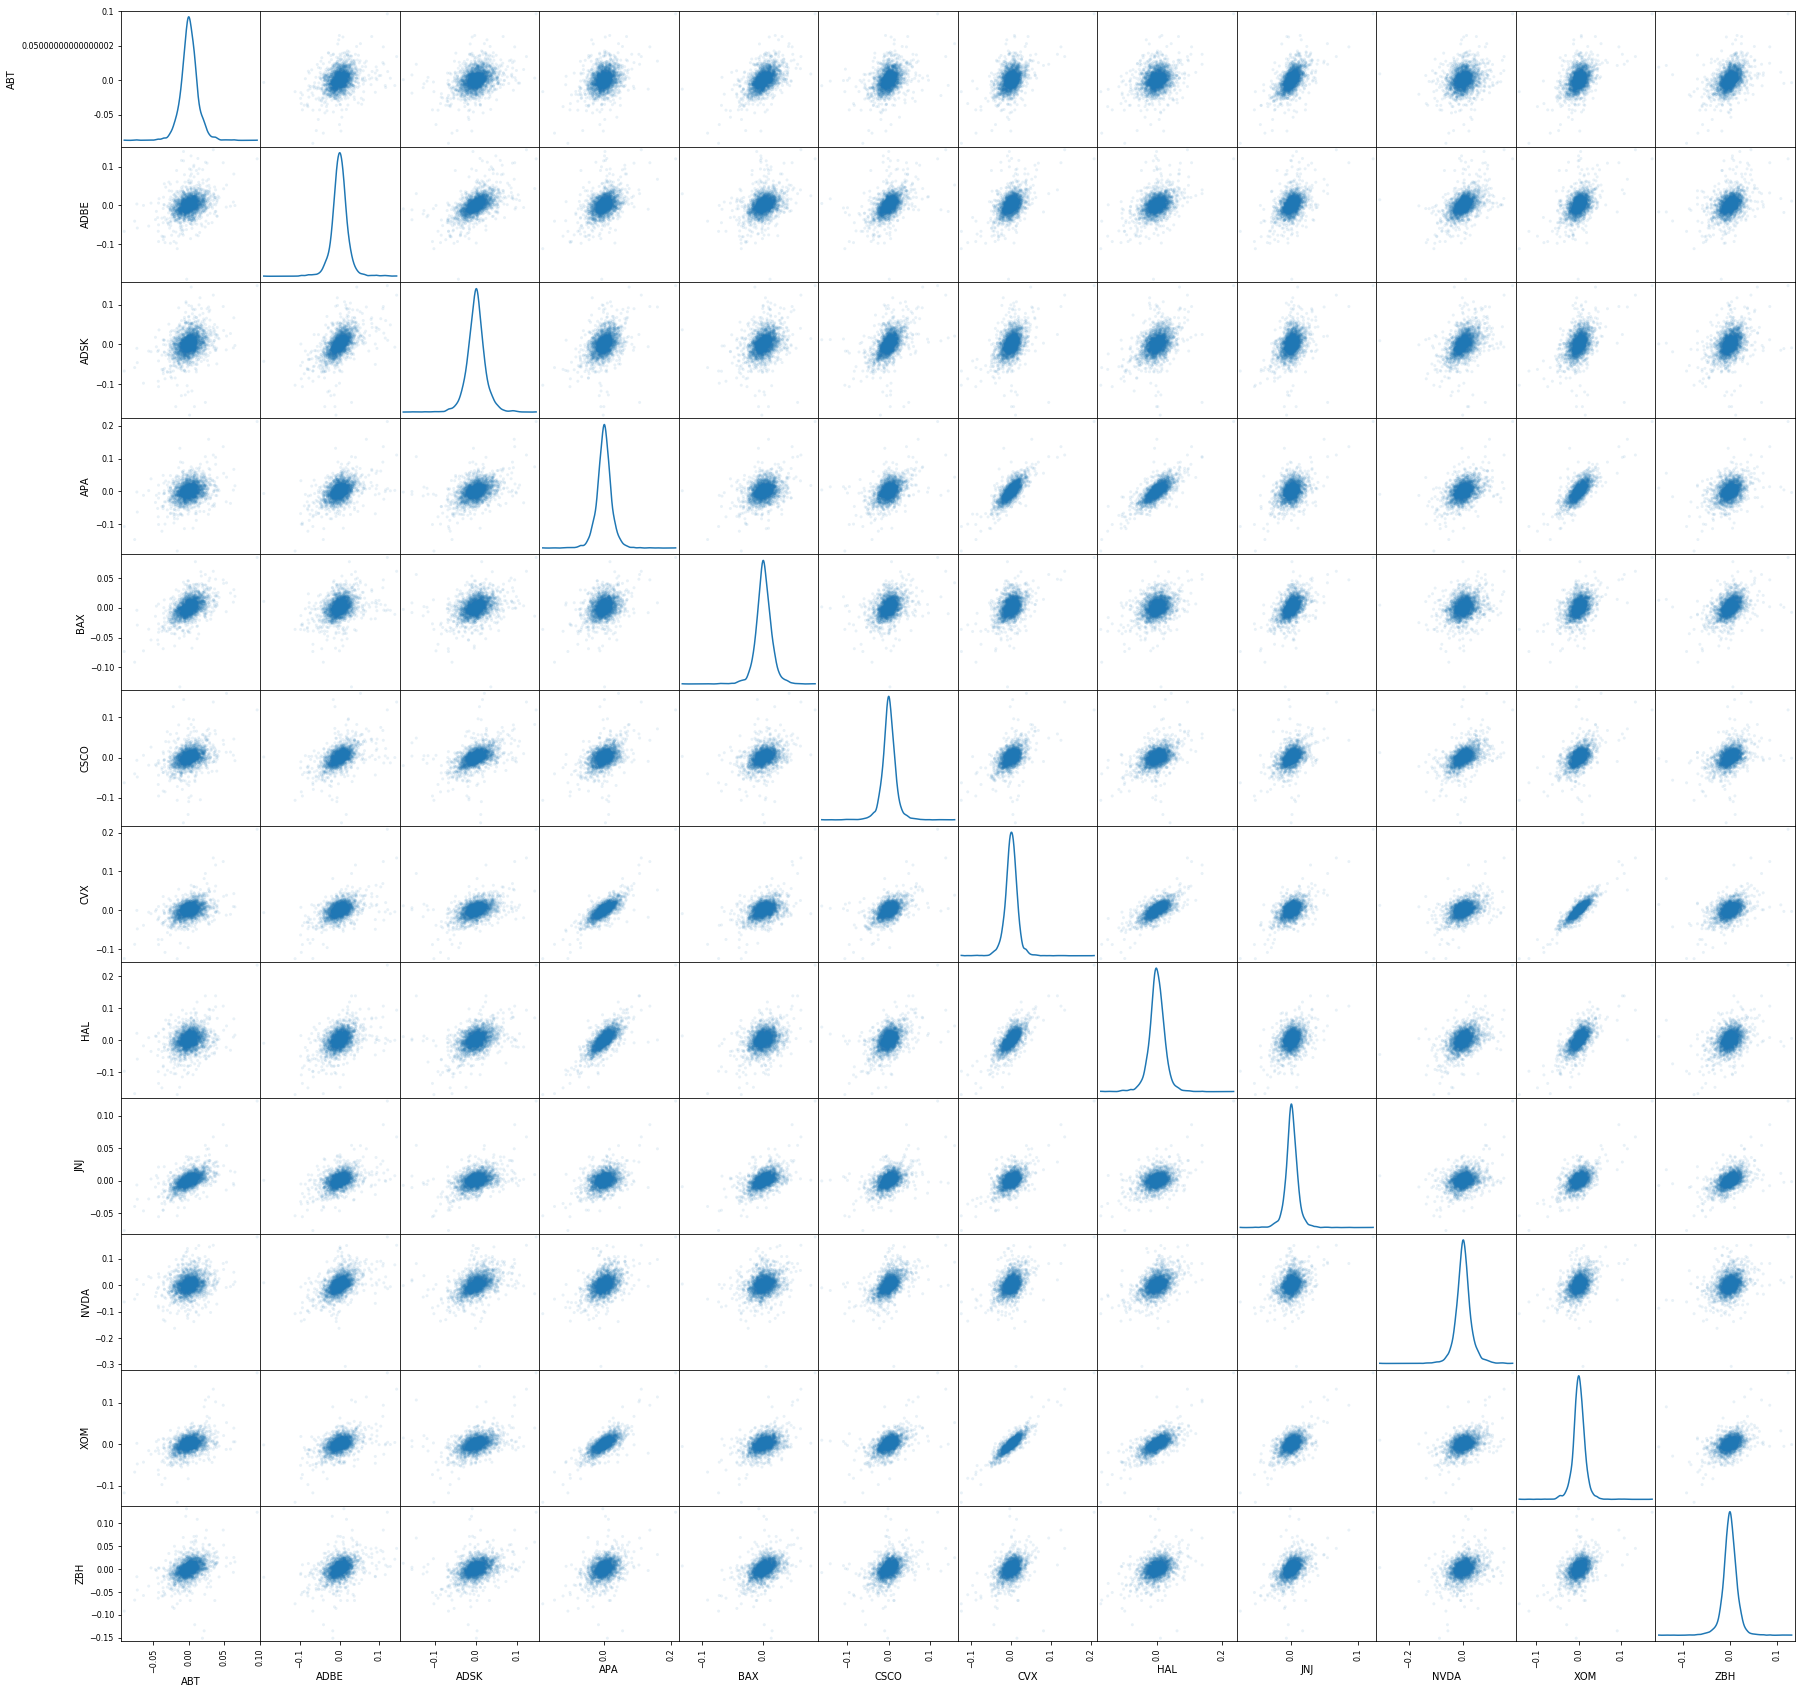

In [44]:
# Comparing all stock relationships against each other to view the various combinations.
# Output may display textual information before final image so scroll down to see the result.
pd.plotting.scatter_matrix(daily_percentage_change_for_stock_data, diagonal='kde', alpha=0.1, figsize=(30, 30))

## Data Segmentation and Rolling Statistics

The Pandas library contains a number of functions that allows for the segmentation of data and the calculation of rolling statistics.

More information: https://www.investopedia.com/university/movingaverage/movingaverages1.asp

Documentation: https://pandas.pydata.org/pandas-docs/version/0.17.0/api.html#standard-moving-window-functions

In [47]:
# Obtain the adjusted closing values for Nvidia from 2010.
nvda_adjusted_closing_2010 = nvda['2010']['Adj Close']
nvda_adjusted_closing_2010.head()

Date
2010-01-04    17.133
2010-01-05    17.383
2010-01-06    17.494
2010-01-07    17.151
2010-01-08    17.188
Name: Adj Close, dtype: float64

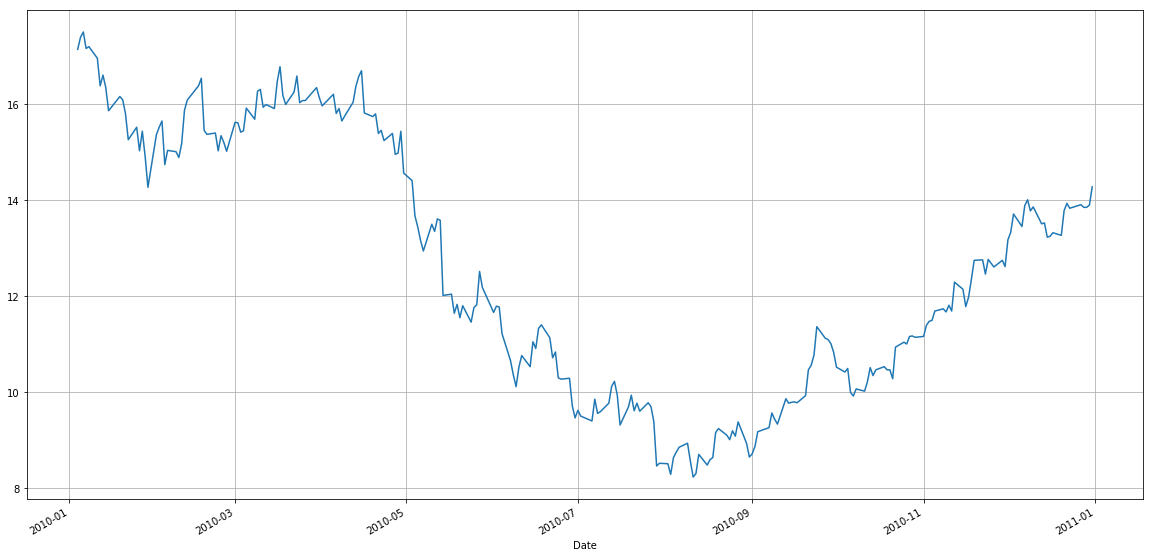

In [48]:
nvda_subset_2010 = nvda_adjusted_closing_2010['2010']
nvda_subset_2010.plot(figsize=(20, 10), grid=True)

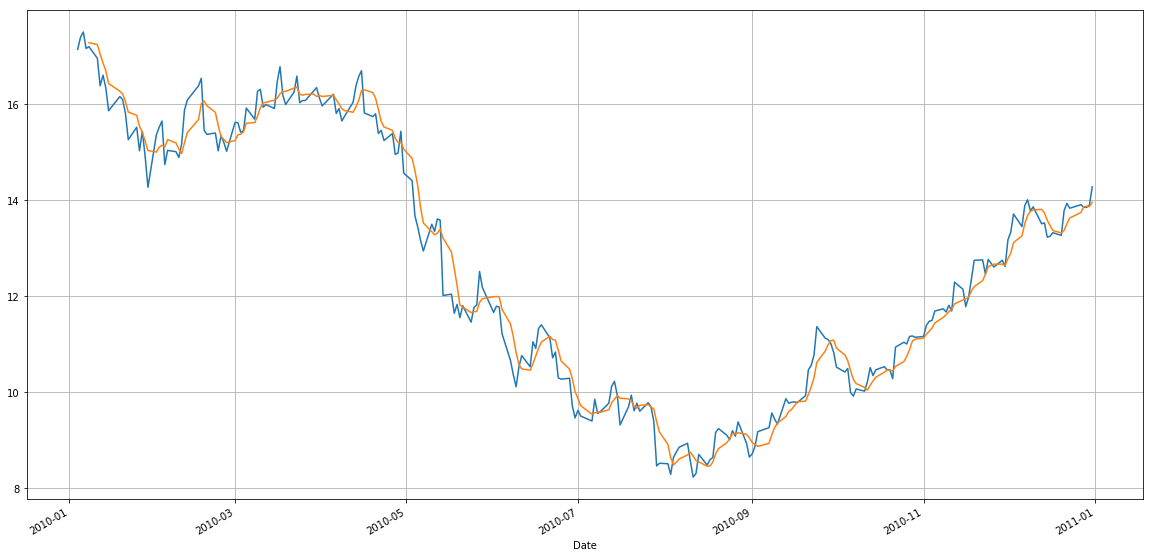

In [49]:
# Plot the rolling mean with five periods against the data above.
nvda_subset_2010.plot(figsize=(20, 10))
nvda_subset_2010.rolling(window=5).mean().plot(grid=True)

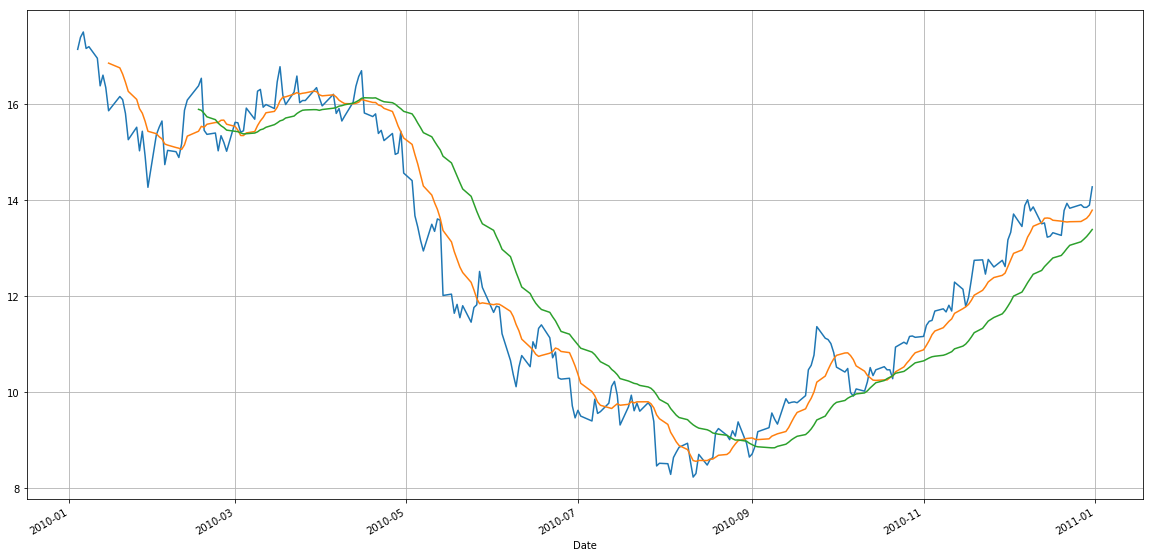

In [50]:
# Increasing the window value will result in a smoother line but with less accuracy.
nvda_subset_2010.plot(figsize=(20, 10))
nvda_subset_2010.rolling(window=10).mean().plot(grid=True)
nvda_subset_2010.rolling(window=30).mean().plot(grid=True)

There is also a rolling correlation function that can be used to find how the correlation between two stocks has changed over time.

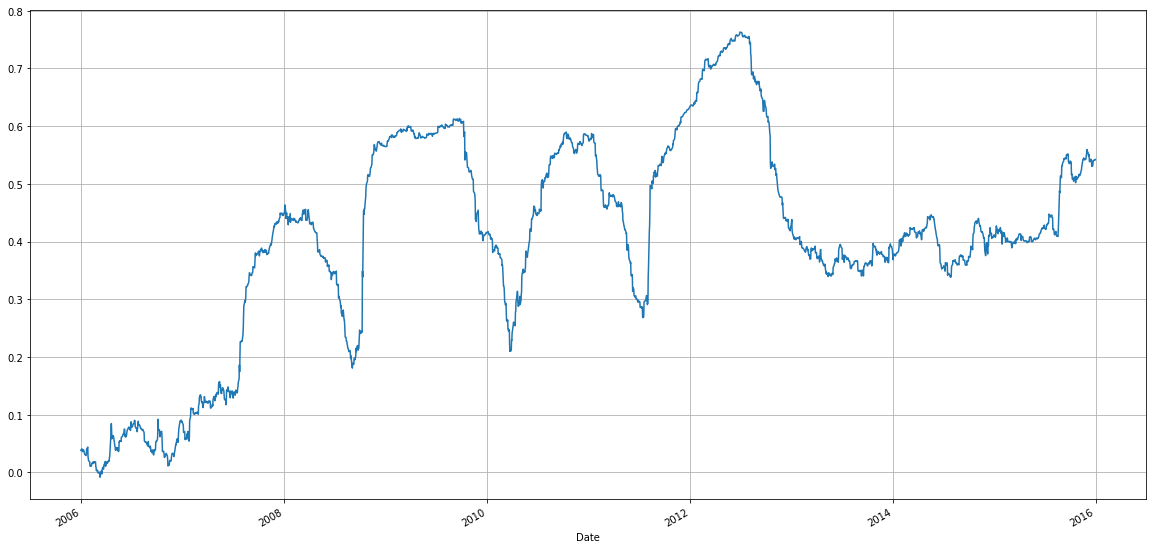

In [51]:
# Calculate and visualize the change in correlation between ABT and XOM based on their daily percentage returns.
# '\' is used to split the code for readability 
rolling_correlation_ABT_XOM = daily_percentage_change_for_stock_data.ABT. \
    rolling(window=252).corr(other=daily_percentage_change_for_stock_data.XOM).dropna() # 252 for an annualized period
rolling_correlation_ABT_XOM.plot(figsize=(20, 10), grid=True)

## Stock Volatility and Ordinary Least Squares Regression 

A stock's volatility, or risk, can be determined by analyzing its fluctuating variance over a time period.

More information: https://www.investopedia.com/terms/v/volatility.asp

Beta: https://www.investopedia.com/terms/b/beta.asp

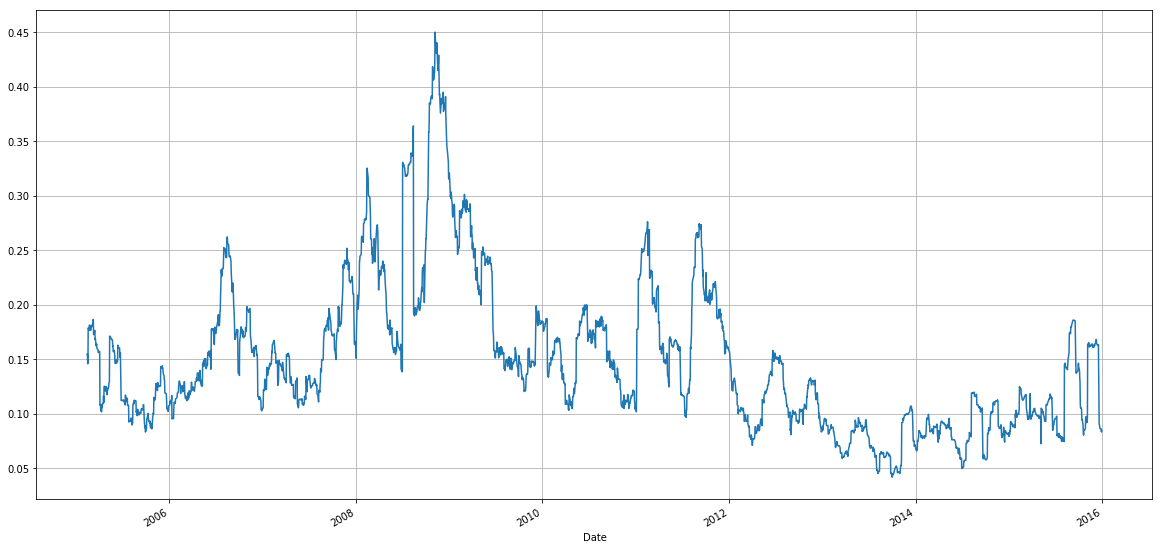

In [52]:
# Calculate volatility for Nvidia with 30 day windows.
nvda_volatility_30 = daily_percentage_change_for_stock_data.NVDA.rolling(window=30).std() * np.sqrt(30)
nvda_volatility_30.plot(figsize=(20, 10), grid=True);

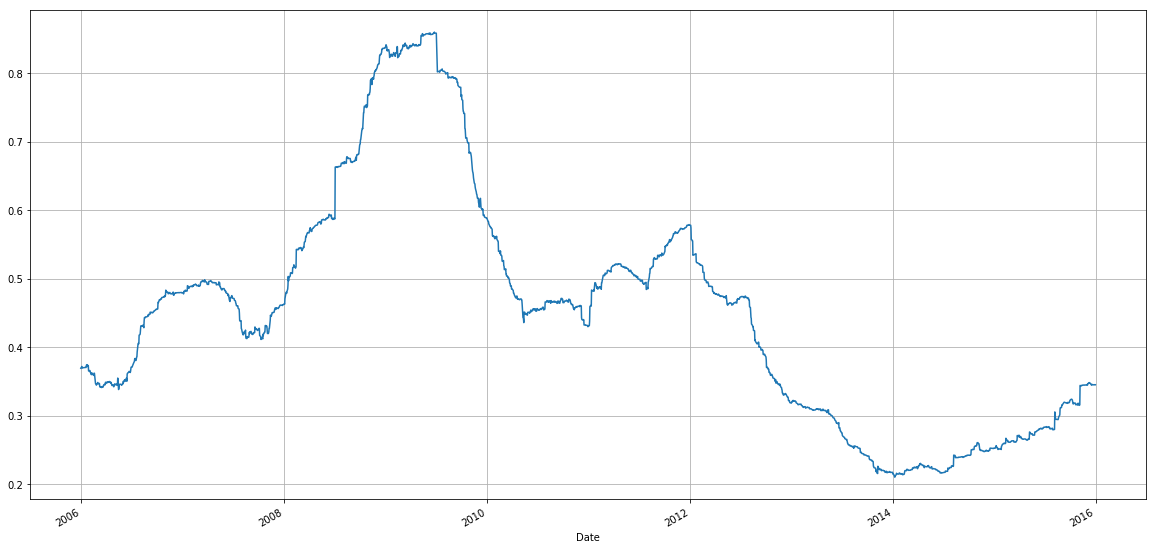

In [53]:
# Calculate annualized volatility for Nvidia.
nvda_volatility_annualized = daily_percentage_change_for_stock_data.NVDA.rolling(window=252).std() * np.sqrt(252)
nvda_volatility_annualized.plot(figsize=(20, 10), grid=True);

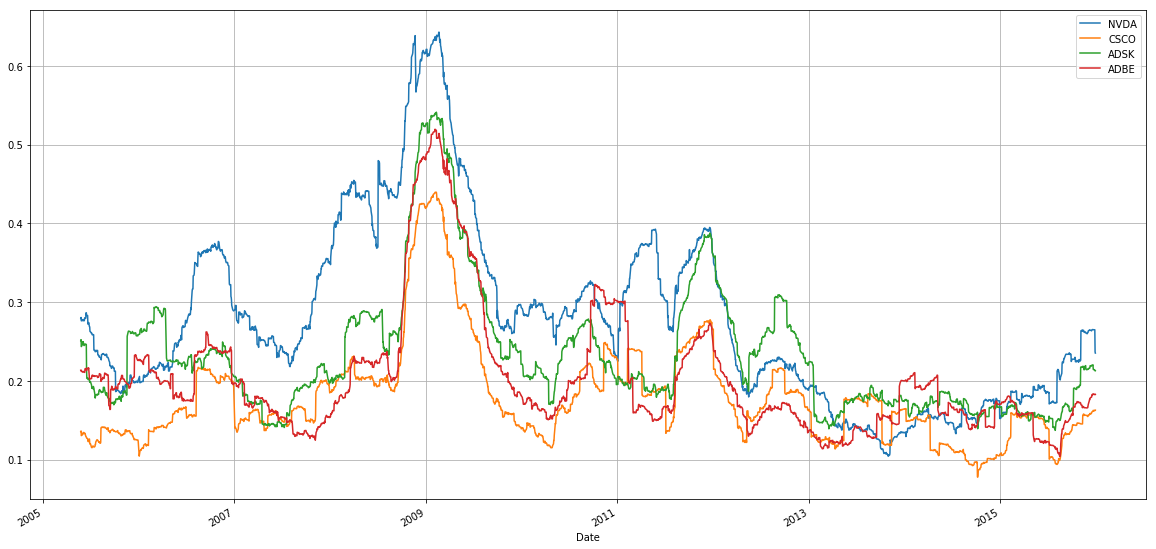

In [54]:
# Comparing volatility in the information technology sector given a window of 100 days. 
nvda_volatility = daily_percentage_change_for_stock_data.NVDA.rolling(window=100).std() * np.sqrt(100)
csco_volatility = daily_percentage_change_for_stock_data.CSCO.rolling(window=100).std() * np.sqrt(100)
adsk_volatility = daily_percentage_change_for_stock_data.ADSK.rolling(window=100).std() * np.sqrt(100)
adbe_volatility = daily_percentage_change_for_stock_data.ADBE.rolling(window=100).std() * np.sqrt(100)

nvda_volatility.plot(figsize=(20, 10), grid=True);
csco_volatility.plot(figsize=(20, 10), grid=True);
adsk_volatility.plot(figsize=(20, 10), grid=True);
adbe_volatility.plot(figsize=(20, 10), grid=True);
plt.legend()

The Python package pyfinance contains an ordinary least squares function that can be used to calculate the change in volatility between two stocks.

More Information: https://www.investopedia.com/terms/l/least-squares-method.asp

Documentation: https://pypi.python.org/pypi/pyfinance

In [55]:
from pyfinance.ols import PandasRollingOLS

# NVDA and XOM are used in this example.
model = PandasRollingOLS(y=daily_percentage_change_for_stock_data.NVDA, x=daily_percentage_change_for_stock_data.XOM, window=200)
# The coefficients
model.beta

            feature1
Date                
2005-10-17     0.347
2005-10-18     0.350
2005-10-19     0.337
2005-10-20     0.326
2005-10-21     0.330
...              ...
2015-12-24     0.513
2015-12-28     0.513
2015-12-29     0.513
2015-12-30     0.517
2015-12-31     0.535

[2570 rows x 1 columns]

In [56]:
# R-squared
model.rsq

Date
2005-10-17    0.046
2005-10-18    0.049
2005-10-19    0.047
2005-10-20    0.045
2005-10-21    0.046
              ...  
2015-12-24    0.111
2015-12-28    0.111
2015-12-29    0.111
2015-12-30    0.113
2015-12-31    0.119
Name: rsq, Length: 2570, dtype: float64

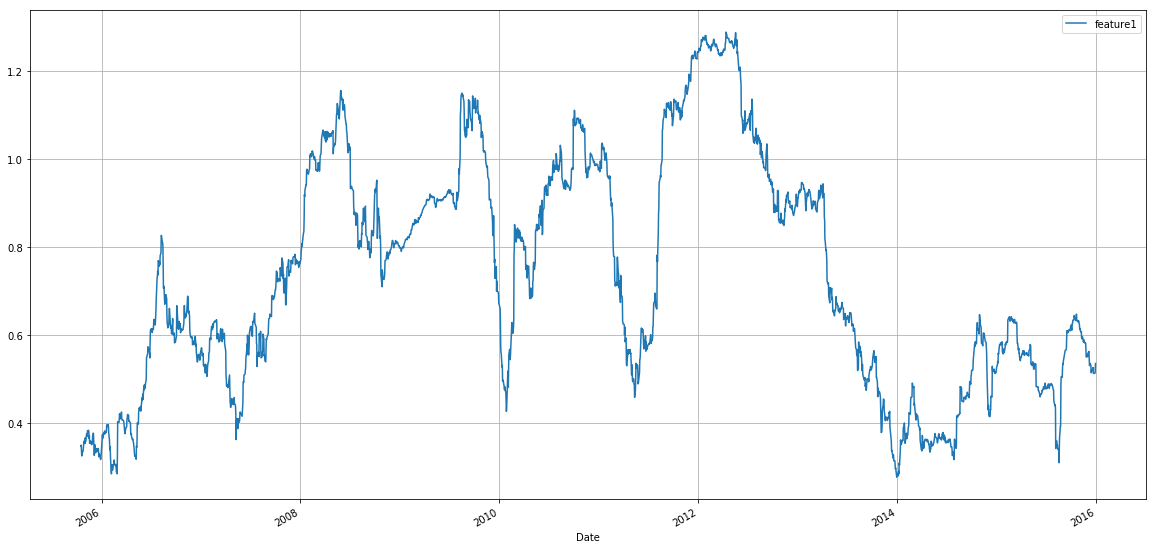

In [57]:
model.beta.plot(figsize=(20, 10), grid=True)

An alternative using the Python module statsmodels.

More Information: http://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

Documentation: http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [63]:
import statsmodels.api as sm

model2 = sm.OLS(daily_percentage_change_for_stock_data['NVDA'], daily_percentage_change_for_stock_data['XOM'])
fit = model2.fit()

In [64]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NVDA   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     600.5
Date:                Thu, 12 Apr 2018   Prob (F-statistic):          3.40e-120
Time:                        15:56:52   Log-Likelihood:                 6058.0
No. Observations:                2769   AIC:                        -1.211e+04
Df Residuals:                    2768   BIC:                        -1.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XOM            0.7990      0.033     24.506      0.000       0.735       0.863
==============================================================================
Omnibus:                      562.879   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11104.735
Skew:                          -0.422   Prob(JB):                         0.00
Kurtosis:                      12.774   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparisions with the S&P 500 market index

Comparing stocks against the Standard & Poor's 500 Index will demonstrate to some degree how certain securities compare to market as a whole.

More Information: https://www.investopedia.com/ask/answers/040215/what-does-sp-500-index-measure-and-how-it-calculated.asp

In [60]:
# Calculate the daily percentage change for the S&P 500 data obtain earlier on in the beginning of this section.
sp500_daily_percentage_change = sp500['Adj Close'].pct_change().fillna(0)
sp500_daily_percentage_change

Date
2005-01-03    0.000
2005-01-04   -0.012
2005-01-05   -0.004
2005-01-06    0.004
2005-01-07   -0.001
              ...  
2015-12-24   -0.002
2015-12-28   -0.002
2015-12-29    0.011
2015-12-30   -0.007
2015-12-31   -0.009
Name: Adj Close, Length: 2769, dtype: float64

In [61]:
# Combine daily percentage change for all of the stock data with the daily percentage change for the S&P 500 in a new DataFrame.
daily_percentage_change_stocks_sp500 = pd.concat([sp500_daily_percentage_change, 
                                                      daily_percentage_change_for_stock_data], axis=1)
daily_percentage_change_stocks_sp500.rename(columns={'Adj Close': 'SP500'}, inplace=True)
daily_percentage_change_stocks_sp500

            SP500    ABT       ADBE    ...           NVDA    XOM        ZBH
Date                                   ...                                 
2005-01-03  0.000  0.000  0.000e+00    ...      0.000e+00  0.000  0.000e+00
2005-01-04 -0.012 -0.010 -2.642e-02    ...     -4.707e-02 -0.007 -3.778e-04
2005-01-05 -0.004 -0.011 -5.495e-03    ...      9.346e-03 -0.005 -7.814e-03
2005-01-06  0.004  0.023 -1.657e-02    ...     -9.700e-03  0.013  1.156e-02
2005-01-07 -0.001  0.017  6.809e-04    ...     -1.915e-02 -0.007 -1.758e-03
...           ...    ...        ...    ...            ...    ...        ...
2015-12-24 -0.002  0.000 -4.224e-03    ...      3.327e-03 -0.011  1.362e-03
2015-12-28 -0.002 -0.002 -1.061e-03    ...     -9.041e-04 -0.007 -6.413e-03
2015-12-29  0.011  0.018  1.200e-02    ...      1.629e-02  0.005  7.253e-03
2015-12-30 -0.007 -0.012 -5.245e-04    ...     -8.610e-03 -0.013 -2.919e-03
2015-12-31 -0.009 -0.008 -1.406e-02    ...     -1.288e-02 -0.002  1.171e-03

[2769 rows 

In [65]:
# Calculate cumulative daily returns.
cumulative_daily_returns_stocks_sp500 = (1 + daily_percentage_change_stocks_sp500).cumprod()
cumulative_daily_returns_stocks_sp500

            SP500    ABT   ADBE  ...     NVDA    XOM    ZBH
Date                             ...                       
2005-01-03  1.000  1.000  1.000  ...    1.000  1.000  1.000
2005-01-04  0.988  0.990  0.974  ...    0.953  0.993  1.000
2005-01-05  0.985  0.979  0.968  ...    0.962  0.988  0.992
2005-01-06  0.988  1.001  0.952  ...    0.953  1.001  1.003
2005-01-07  0.987  1.018  0.953  ...    0.934  0.994  1.002
...           ...    ...    ...  ...      ...    ...    ...
2015-12-24  1.715  3.493  3.058  ...    4.491  2.058  1.344
2015-12-28  1.711  3.487  3.055  ...    4.487  2.043  1.335
2015-12-29  1.729  3.549  3.092  ...    4.560  2.053  1.345
2015-12-30  1.716  3.506  3.090  ...    4.521  2.026  1.341
2015-12-31  1.700  3.478  3.047  ...    4.462  2.022  1.342

[2769 rows x 13 columns]

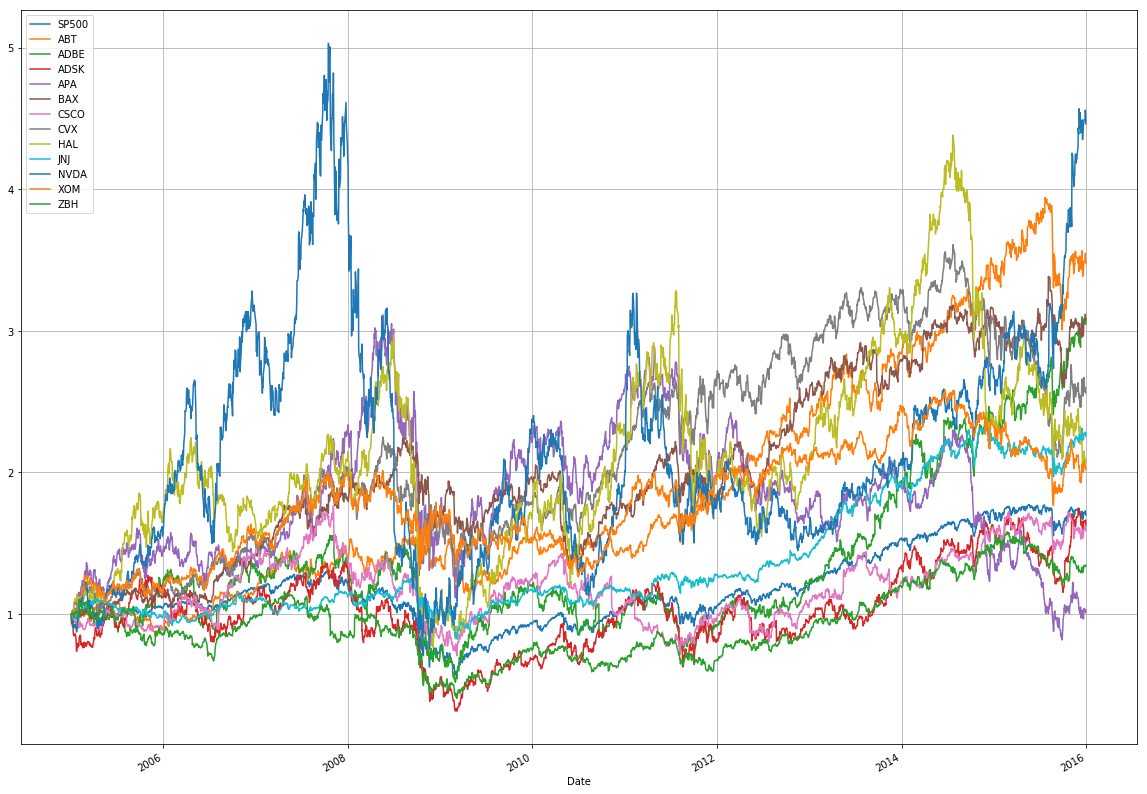

In [66]:
# Plot the cumulative daily returns with all of the data.
cumulative_daily_returns_stocks_sp500.plot(figsize=(20, 15), grid=True)

In [74]:
# Calculate the correlation of all available daily values.
pd.options.display.max_columns = None # Removes display limit for columns to show all correlation values.
pd.options.display.max_rows = None # Removes display limit for rows to show all correlation values.
dpc_stocks_sp500_correlation = daily_percentage_change_stocks_sp500.corr()
dpc_stocks_sp500_correlation

       SP500    ABT   ADBE   ADSK    APA    BAX   CSCO    CVX    HAL    JNJ  \
SP500  1.000  0.561  0.657  0.634  0.682  0.558  0.700  0.778  0.676  0.688   
ABT    0.561  1.000  0.334  0.342  0.319  0.520  0.350  0.424  0.292  0.579   
ADBE   0.657  0.334  1.000  0.549  0.437  0.347  0.496  0.472  0.428  0.431   
ADSK   0.634  0.342  0.549  1.000  0.415  0.342  0.482  0.446  0.415  0.409   
APA    0.682  0.319  0.437  0.415  1.000  0.344  0.439  0.768  0.747  0.415   
BAX    0.558  0.520  0.347  0.342  0.344  1.000  0.361  0.434  0.346  0.515   
CSCO   0.700  0.350  0.496  0.482  0.439  0.361  1.000  0.502  0.442  0.457   
CVX    0.778  0.424  0.472  0.446  0.768  0.434  0.502  1.000  0.718  0.540   
HAL    0.676  0.292  0.428  0.415  0.747  0.346  0.442  0.718  1.000  0.405   
JNJ    0.688  0.579  0.431  0.409  0.415  0.515  0.457  0.540  0.405  1.000   
NVDA   0.585  0.241  0.465  0.438  0.425  0.278  0.501  0.425  0.445  0.319   
XOM    0.772  0.435  0.459  0.435  0.739  0.438  0.5

In [78]:
# Display the data in a more formated way.
from IPython.display import display, HTML
display(HTML(dpc_stocks_sp500_correlation.to_html()))

In [83]:
# Displaying the correlations of the S&P 500.
display(dpc_stocks_sp500_correlation.SP500)

SP500    1.000
ABT      0.561
ADBE     0.657
ADSK     0.634
APA      0.682
BAX      0.558
CSCO     0.700
CVX      0.778
HAL      0.676
JNJ      0.688
NVDA     0.585
XOM      0.772
ZBH      0.583
Name: SP500, dtype: float64

CVX (0.778) had movements most comparable to the S&P while BAX (0.558) showed the least similarities.

These stocks can be plotted to visualize the differences in activity and their relationship to the S&P 500.

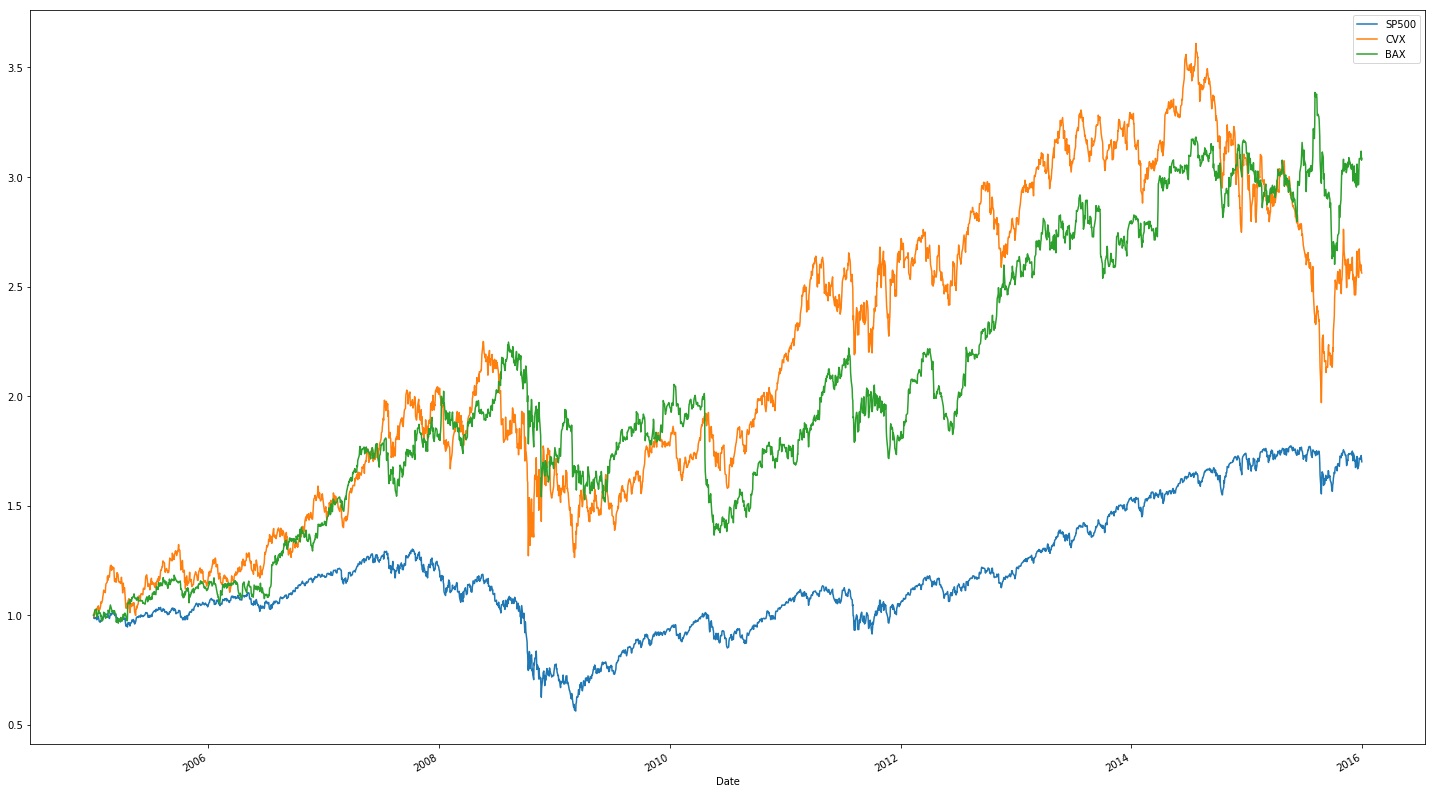

In [70]:
cumulative_daily_returns_stocks_sp500[['SP500', 'CVX', 'BAX']].plot(figsize=(25 ,15));

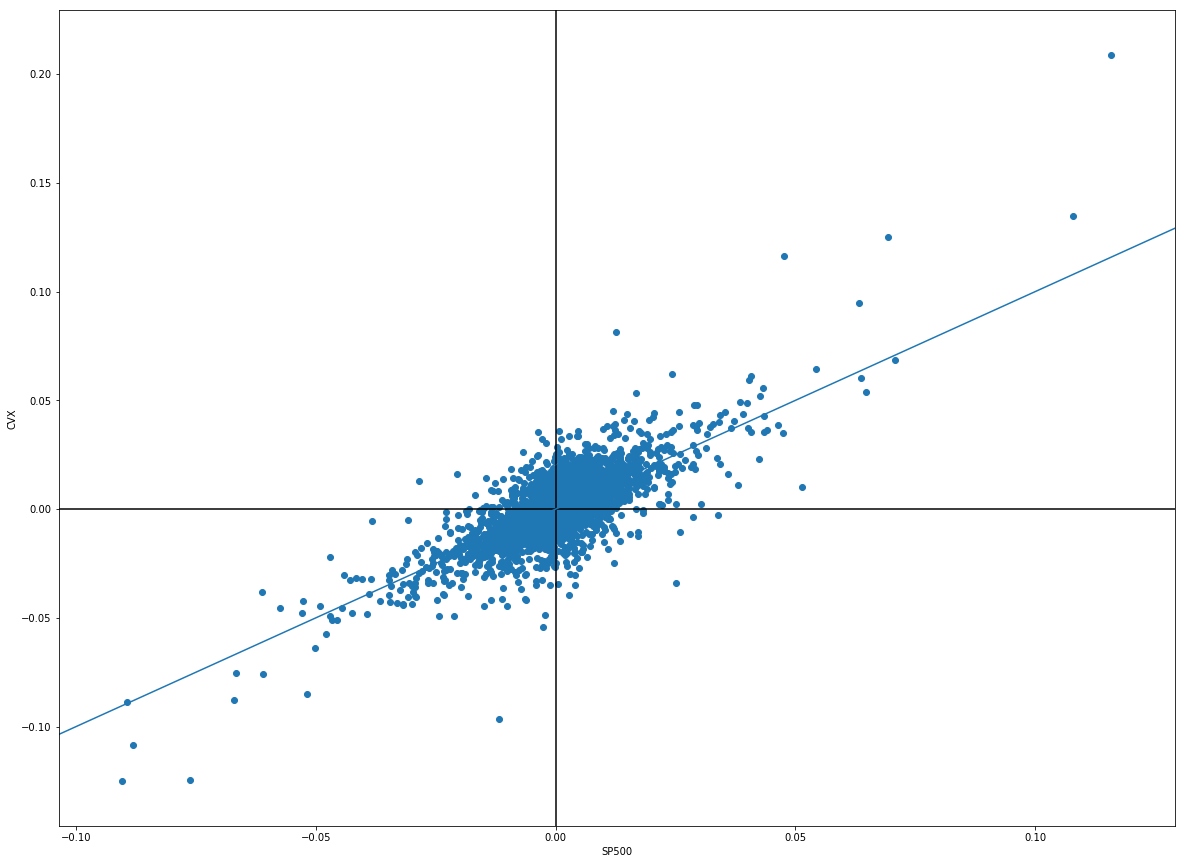

In [71]:
# The tighter distribution of points reflects the 0.778 correlation value. 
display_scatter_plot(daily_percentage_change_stocks_sp500, 'SP500', 'CVX')

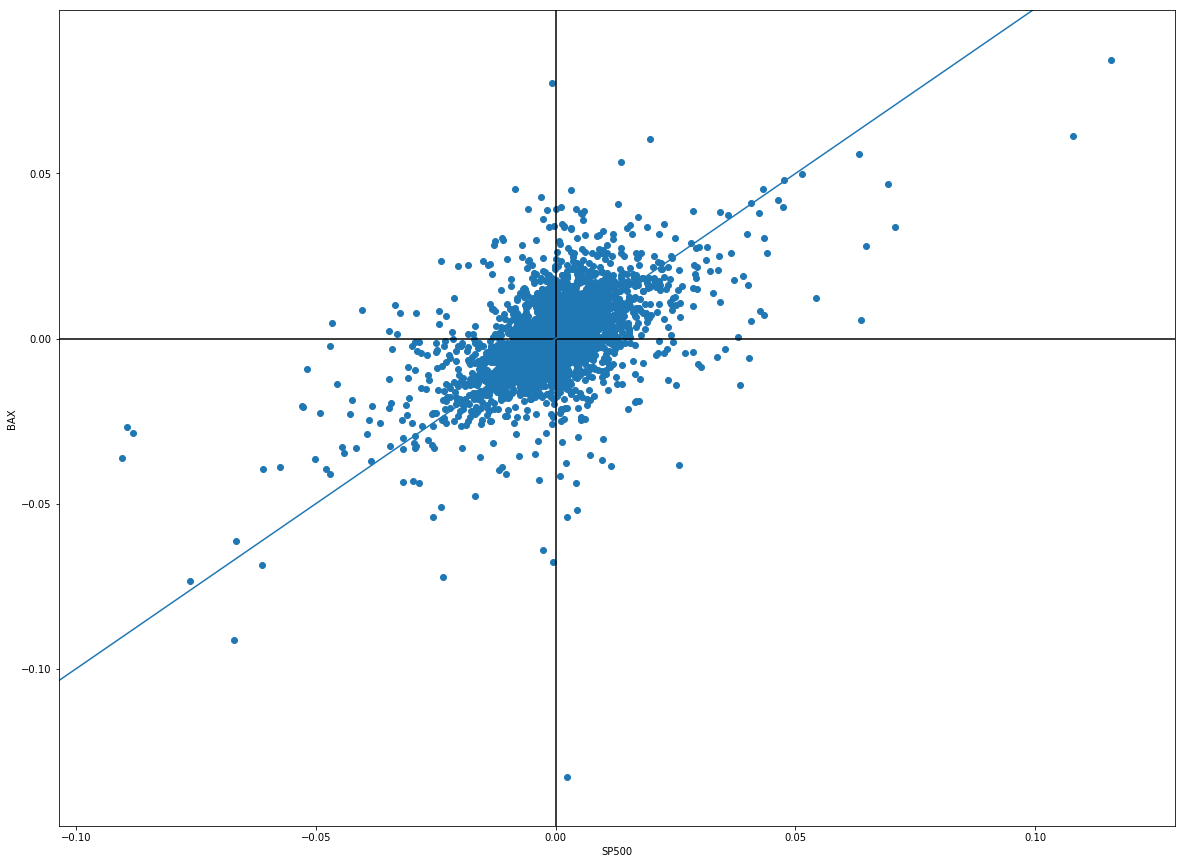

In [72]:
# The correlation is significantly less prominent for BAX given the wider distribution.
display_scatter_plot(daily_percentage_change_stocks_sp500, 'SP500', 'BAX')

In [ ]:
# If executed after a plot creation then this command will save the resulting plot on the local machine.
# plt.savefig('Image.png', bbox_inches='tight', dpi=300)